# Peer to peer Lending Credit Risk Assessment on the Basis of Social profile and Financial Profile of a person.

In [71]:
#Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from datetime import datetime

In [72]:
# loading the required dataset;
loan_df=pd.read_csv("C:\\Users\\kanch\\Downloads\\prosperLoanData.csv")

In [73]:
pd.set_option("display.max_columns",None)

In [16]:
# shape of the dataset
loan_df.shape

(113937, 81)

In [74]:
#Checking first five rows of the dataset;
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

# Describing the data

In [11]:
loan_df.info() # shows the rows and columns in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [18]:
#summary statistics test
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

**Unique values**: It refer to distinct or different values in a dataset.

A unique value occurs only once in the dataset, and it can be used to identify individual observations or instances.

**Duplicate values**: It refer to the presence of multiple identical or nearly identical examples or instances in a dataset.

These duplicates can lead to biased models and inaccurate predictions because they increase the weight of those duplicated examples in the training process, potentially leading the model to overemphasize certain patterns or correlations.

In [19]:
#Identify the duplicate data
print(loan_df['ListingKey'].nunique())
print(loan_df['ListingNumber'].nunique())
print(loan_df['LoanKey'].nunique())
print(loan_df['LoanNumber'].nunique())
print(loan_df['MemberKey'].nunique())
     

113066
113066
113066
113066
90831


In [20]:
#Remove duplicate data 
loan_df.drop_duplicates(subset = 'ListingKey', inplace = True)
loan_df.drop_duplicates(subset = 'ListingNumber', inplace = True)
loan_df.drop_duplicates(subset = 'LoanKey', inplace = True)
loan_df.drop_duplicates(subset = 'LoanNumber', inplace = True)
loan_df.drop_duplicates(subset = 'MemberKey', inplace = True)

In [22]:
#After removing duplicate data we will check the shape of dataset.
loan_df.shape

(90831, 81)

**Missing values**:It refer to the absence of a particular value or observation in a dataset.

These missing values can occur due to various reasons such as human errors during data entry, data corruption during transmission or storage, or simply because the data was never collected in the first place.

In [24]:
# Finding the missing values 
columns=loan_df.columns
for i in columns:
  print(i,sum(pd.isnull(loan_df[i])))

ListingKey 0
ListingNumber 0
ListingCreationDate 0
CreditGrade 67003
Term 0
LoanStatus 0
ClosedDate 49801
BorrowerAPR 20
BorrowerRate 0
LenderYield 0
EstimatedEffectiveYield 23895
EstimatedLoss 23895
EstimatedReturn 23895
ProsperRating (numeric) 23895
ProsperRating (Alpha) 23895
ProsperScore 23895
ListingCategory (numeric) 0
BorrowerState 4360
Occupation 3190
EmploymentStatus 1927
EmploymentStatusDuration 6604
IsBorrowerHomeowner 0
CurrentlyInGroup 0
GroupKey 80587
DateCreditPulled 0
CreditScoreRangeLower 510
CreditScoreRangeUpper 510
FirstRecordedCreditLine 606
CurrentCreditLines 6590
OpenCreditLines 6590
TotalCreditLinespast7years 606
OpenRevolvingAccounts 0
OpenRevolvingMonthlyPayment 0
InquiriesLast6Months 606
TotalInquiries 996
CurrentDelinquencies 606
AmountDelinquent 6606
DelinquenciesLast7Years 854
PublicRecordsLast10Years 606
PublicRecordsLast12Months 6590
RevolvingCreditBalance 6590
BankcardUtilization 6590
AvailableBankcardCredit 6541
TotalTrades 6541
TradesNeverDelinquent (

Here total dataset size is 90831

We can remove the columns with null values more than 50,000

Here the list of null values with more than 50,000

CreditGrade 67003

ClosedDate 49801

GroupKey 80587

TotalProsperLoans 82251

TotalProsperPaymentsBilled 82251

OnTimeProsperPayments 82251

ProsperPaymentsLessThanOneMonthLate 82251

ProsperPaymentsOneMonthPlusLate 82251

ProsperPrincipalBorrowed 82251

ProsperPrincipalOutstanding 82251

ScorexChangeAtTimeOfListing 83521

LoanFirstDefaultedCycleNumber 75779

As per Project the Creditgrade and closed date attributes are important features we will not remove them.

The below five are unique identifiers they don't show any effect in the model

ListingKey

ListingNumber

LoanKey

Loan Number

Member key

In [25]:
#The attributes which are not useful for project.
col=["GroupKey","TotalProsperLoans","TotalProsperPaymentsBilled","OnTimeProsperPayments","ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate",
     "ProsperPrincipalBorrowed","ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber","ListingKey","ListingNumber","LoanKey",
     "LoanNumber","MemberKey","EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn","ProsperRating (numeric)","ProsperRating (Alpha)","InvestmentFromFriendsCount",
     "Recommendations" , "LP_NonPrincipalRecoverypayments", "LP_NetPrincipalLoss", "LP_GrossPrincipalLoss","LP_CollectionFees","PercentFunded","LP_ServiceFees","LP_InterestandFees",
     "LP_CustomerPrincipalPayments","LP_CustomerPayments","InvestmentFromFriendsAmount","PublicRecordsLast10Years","PublicRecordsLast12Months"]


In [26]:
# Drop the columns list.
for i in col :
  loan_df=loan_df.drop([i], axis='columns')

In [28]:
#After removing columns list we will check the shape of dataset.
loan_df.shape

(90831, 47)

## Handling the missing Data
**Iterative Imputer**: It is a machine learning technique used for missing data imputation. Missing data imputation refers to the process of replacing missing values in a dataset with estimates based on the available data.

The iterative imputer is a popular method for missing data imputation because it can handle missing data that is non-random and can capture the complex relationships between variables.

In [29]:
#filling the float values with  iterative imputer by mean
loan_df_cat_col = loan_df.select_dtypes(include=('float')).columns
loan_df_cat_col
for B in loan_df_cat_col:
  imputer = IterativeImputer(max_iter=10, random_state=0)
  imputer = imputer.fit(loan_df[[B]])
  loan_df[B] = imputer.transform(loan_df[[B]])

In [31]:
#filling the object values with  iterative imputer by most_frequent
loan_df_cat_col = loan_df.select_dtypes(include=('object'),exclude=()).columns
loan_df_cat_col = loan_df_cat_col.drop('ClosedDate')
loan_df_cat_col = loan_df_cat_col.drop('LoanStatus')
for B in loan_df_cat_col:
  imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
  imputer = imputer.fit(loan_df[[B]])
  loan_df[B] = imputer.transform(loan_df[[B]])

In [32]:
# check the attributes if the all null values are changed or not
columns=loan_df.columns
for i in columns:
  print(i,sum(pd.isnull(loan_df[i])))

ListingCreationDate 0
CreditGrade 0
Term 0
LoanStatus 0
ClosedDate 49801
BorrowerAPR 0
BorrowerRate 0
LenderYield 0
ProsperScore 0
ListingCategory (numeric) 0
BorrowerState 0
Occupation 0
EmploymentStatus 0
EmploymentStatusDuration 0
IsBorrowerHomeowner 0
CurrentlyInGroup 0
DateCreditPulled 0
CreditScoreRangeLower 0
CreditScoreRangeUpper 0
FirstRecordedCreditLine 0
CurrentCreditLines 0
OpenCreditLines 0
TotalCreditLinespast7years 0
OpenRevolvingAccounts 0
OpenRevolvingMonthlyPayment 0
InquiriesLast6Months 0
TotalInquiries 0
CurrentDelinquencies 0
AmountDelinquent 0
DelinquenciesLast7Years 0
RevolvingCreditBalance 0
BankcardUtilization 0
AvailableBankcardCredit 0
TotalTrades 0
TradesNeverDelinquent (percentage) 0
TradesOpenedLast6Months 0
DebtToIncomeRatio 0
IncomeRange 0
IncomeVerifiable 0
StatedMonthlyIncome 0
LoanCurrentDaysDelinquent 0
LoanMonthsSinceOrigination 0
LoanOriginalAmount 0
LoanOriginationDate 0
LoanOriginationQuarter 0
MonthlyLoanPayment 0
Investors 0


In [33]:
loan_df['LoanStatus'].value_counts()

Current                   48042
Completed                 25925
Chargedoff                10457
Defaulted                  4644
Past Due (1-15 days)        619
Past Due (31-60 days)       297
Past Due (61-90 days)       237
Past Due (91-120 days)      234
Past Due (16-30 days)       204
FinalPaymentInProgress      155
Past Due (>120 days)         13
Cancelled                     4
Name: LoanStatus, dtype: int64

In [36]:
# Removing 'Current' row from the column;
loan_df.drop(loan_df[(loan_df['LoanStatus'] == 'Current')].index, inplace=True)
     

In [37]:
loan_df.drop(loan_df[(loan_df['LoanStatus'] == 'FinalPaymentInProgress')].index, inplace=True)

In [38]:
loan_df.shape

(42634, 47)

In [39]:
loan_df['LoanStatus'].value_counts()

Completed                 25925
Chargedoff                10457
Defaulted                  4644
Past Due (1-15 days)        619
Past Due (31-60 days)       297
Past Due (61-90 days)       237
Past Due (91-120 days)      234
Past Due (16-30 days)       204
Past Due (>120 days)         13
Cancelled                     4
Name: LoanStatus, dtype: int64

In [40]:
# LoanStatus is our target,so mapping it into binary column values;
loan_df['LoanStatus']=loan_df['ClosedDate'].apply(lambda x:1 if not pd.isnull(x) else 0)

In [41]:

loan_df['LoanStatus'].value_counts()

1    41030
0     1604
Name: LoanStatus, dtype: int64

In [42]:
loan_df['LoanCurrentDaysDelinquent'].value_counts()

0       25929
121       250
10        140
4          56
5          51
        ...  
1030        1
2171        1
2703        1
1104        1
1081        1
Name: LoanCurrentDaysDelinquent, Length: 2397, dtype: int64

In [155]:
loan_df['LoanStatus']=loan_df['LoanCurrentDaysDelinquent'].apply(lambda x:1 if x>180 else 0)

In [156]:

loan_df['LoanStatus'].value_counts()

0    98874
1    15063
Name: LoanStatus, dtype: int64

In [45]:

loan_df.drop(['LoanCurrentDaysDelinquent','ClosedDate'],axis=1,inplace=True)

C:\Users\kanch\AppData\Local\Temp\ipykernel_19704\2526366115.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


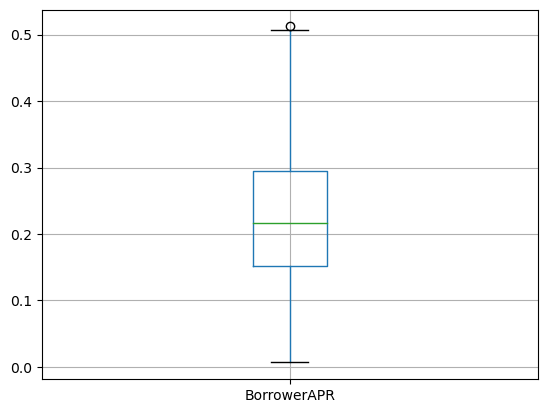

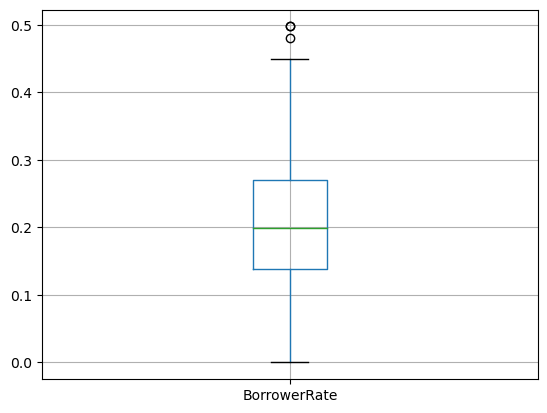

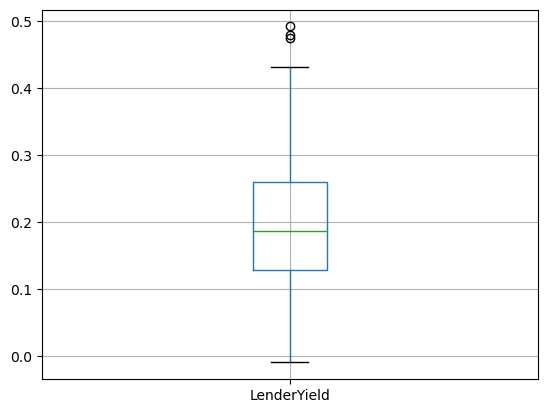

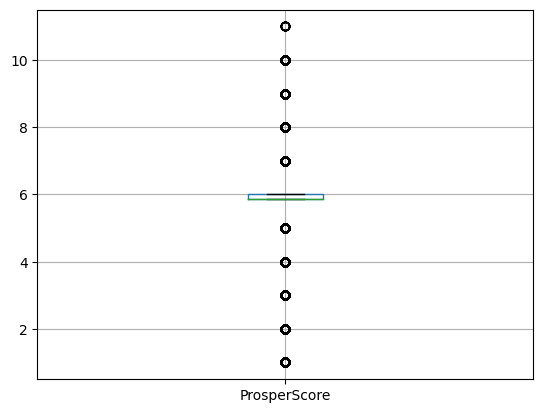

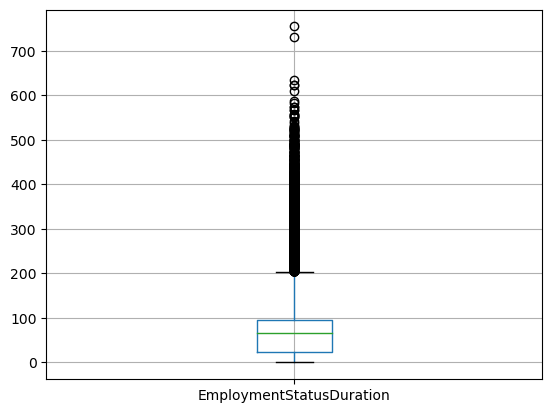

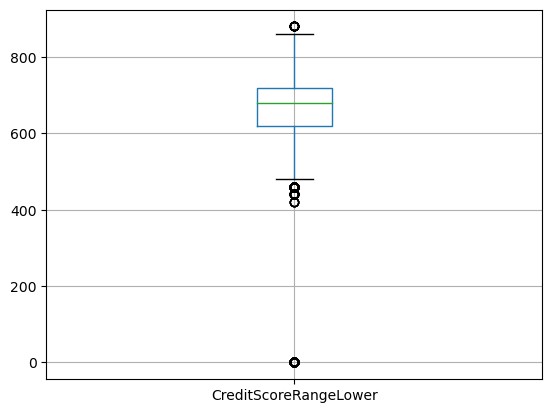

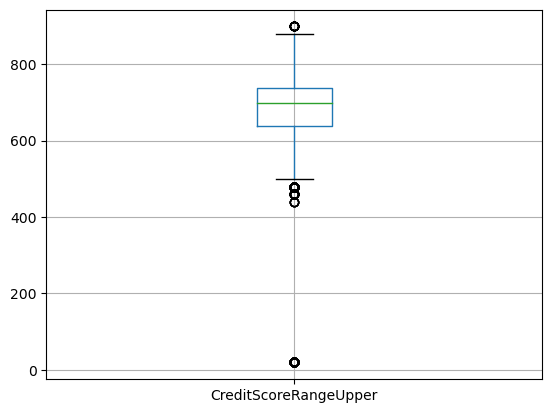

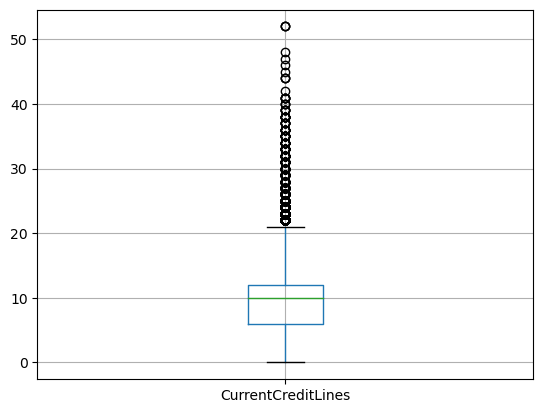

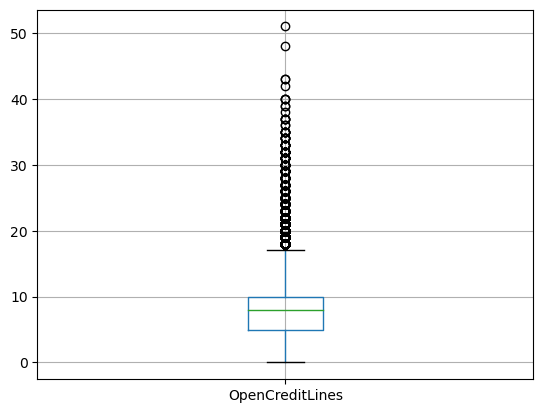

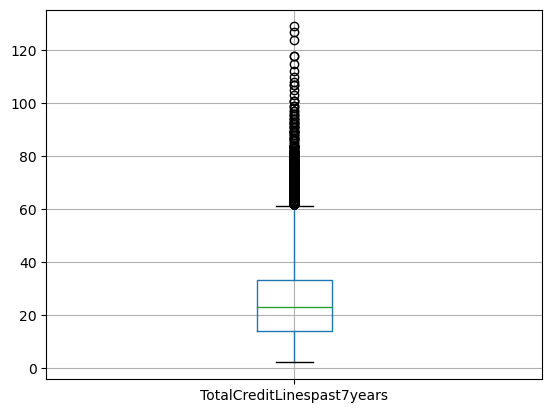

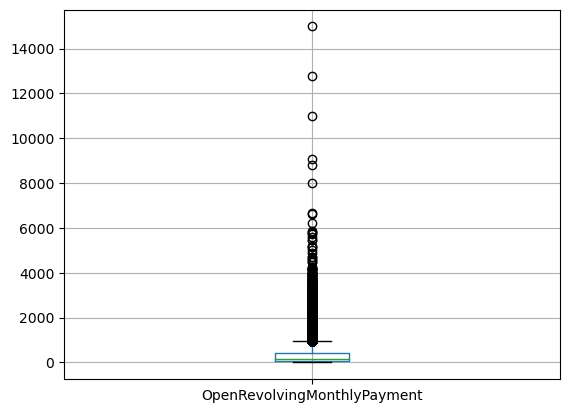

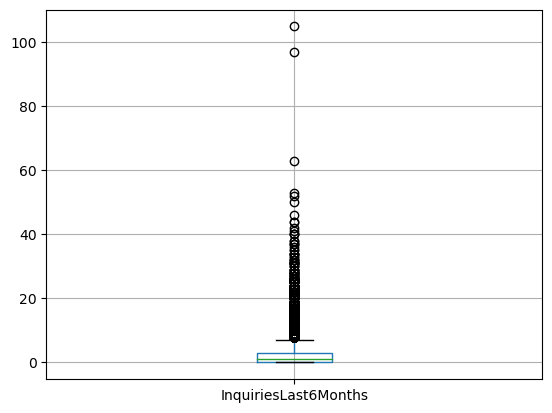

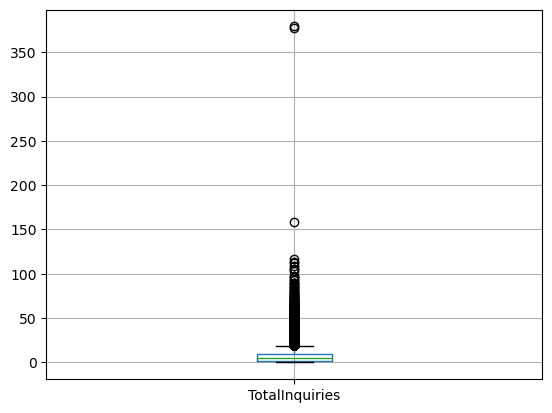

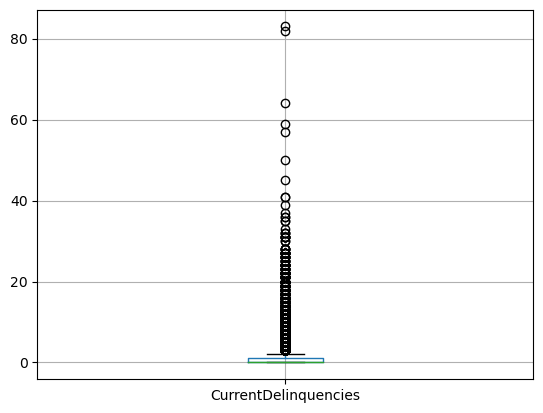

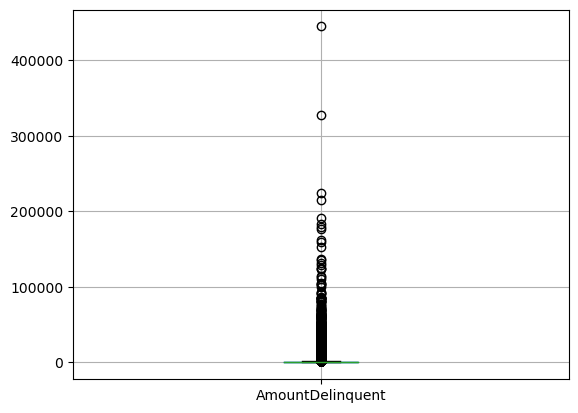

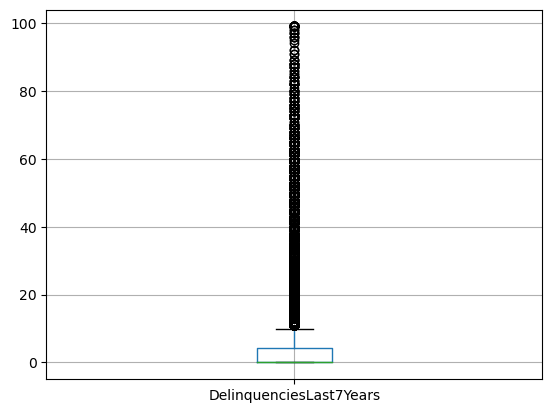

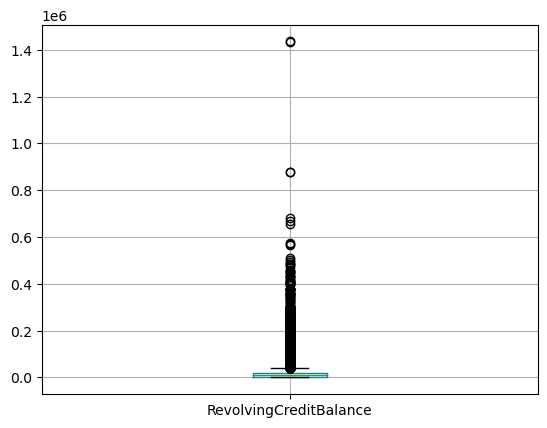

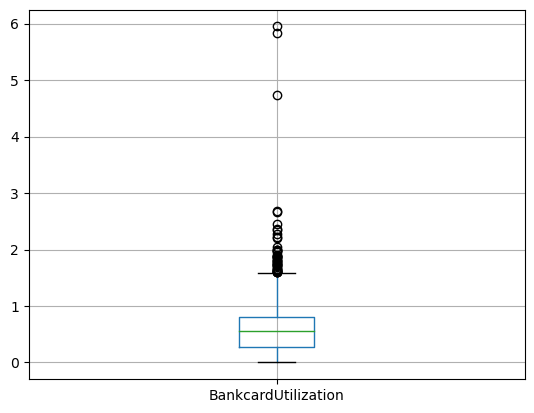

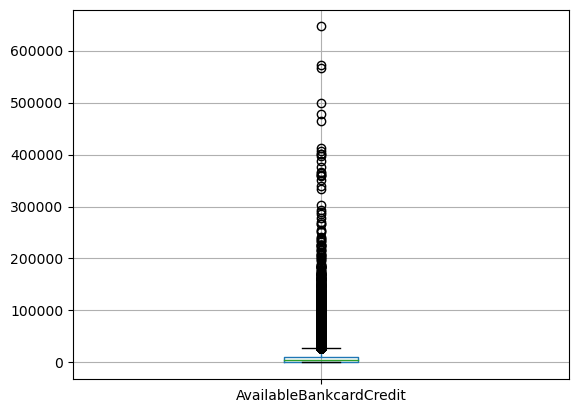

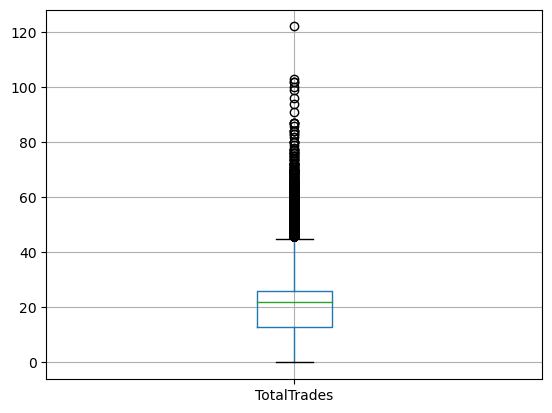

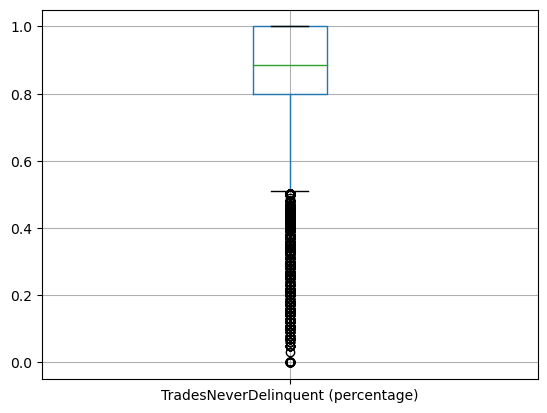

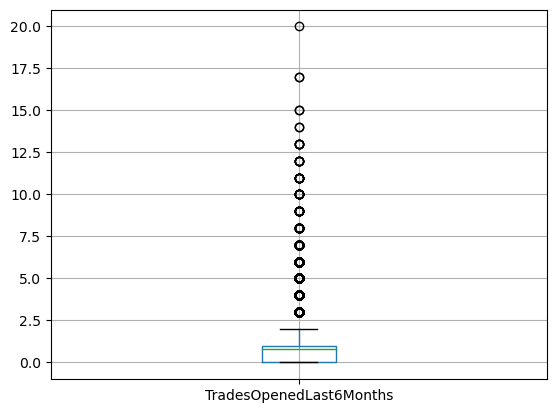

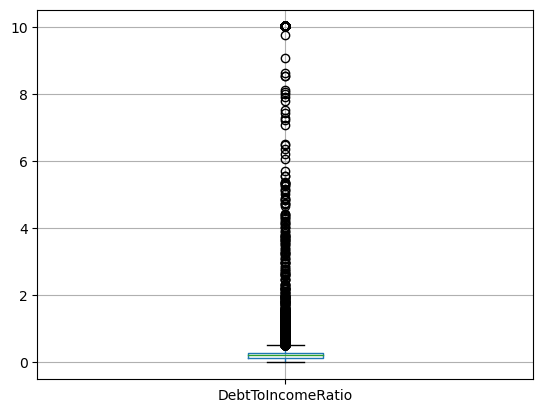

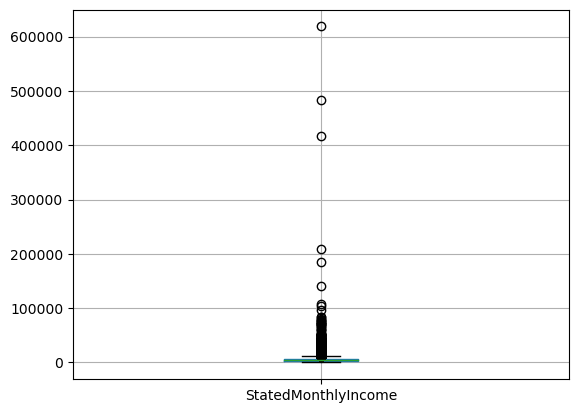

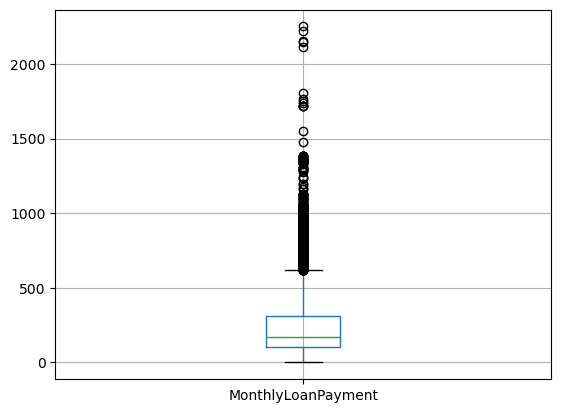

In [46]:
#check for outliers by using boxplot
col = loan_df.select_dtypes(include=('float')).columns
for column in col:
    plt.figure()
    loan_df.boxplot([column])
     

IQR --> Interquartile Range
The IQR is often used in machine learning for outlier detection, as it helps identify values that fall outside of the typical range of values in the dataset. Specifically, any value that is more than 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3) is considered an outlier.

In [49]:
# Removing outliers from dataset by using IQR
print("shape of data set before removing outliers",loan_df.shape)
col = loan_df.col = loan_df.select_dtypes(include=('float')).columns
for i in col :
  q1 = loan_df[i].quantile(0.25)
  q3 = loan_df[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr
  outliers = loan_df[(loan_df[i] < lower_bound)|(loan_df[i] > upper_bound)]
  loan_df = loan_df.drop(outliers.index)
print("shape of data set after removing outliers",loan_df.shape)

shape of data set before removing outliers (9186, 45)
shape of data set after removing outliers (2881, 45)


C:\Users\kanch\AppData\Local\Temp\ipykernel_19704\3339455910.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  col = loan_df.col = loan_df.select_dtypes(include=('float')).columns


C:\Users\kanch\AppData\Local\Temp\ipykernel_19704\654874632.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


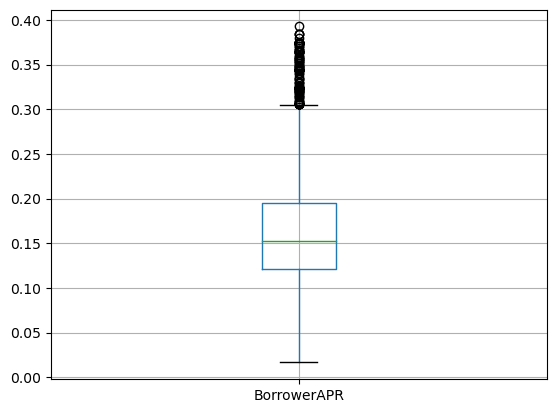

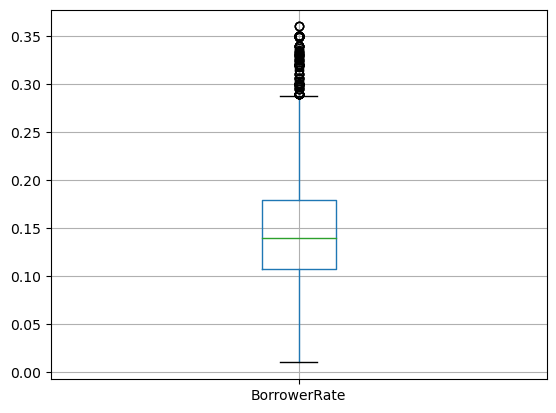

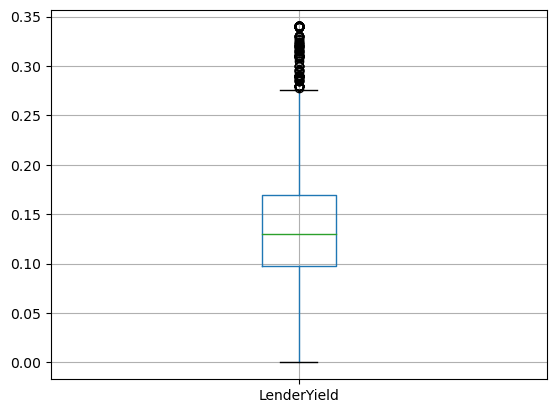

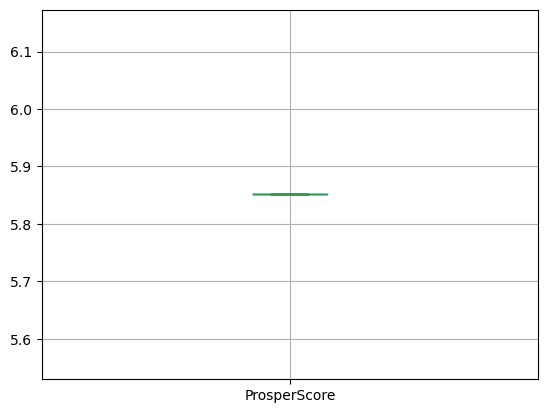

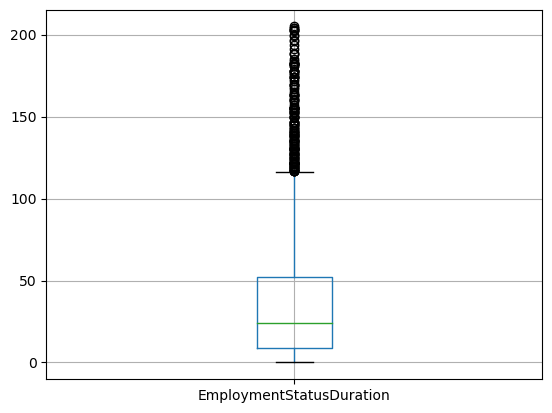

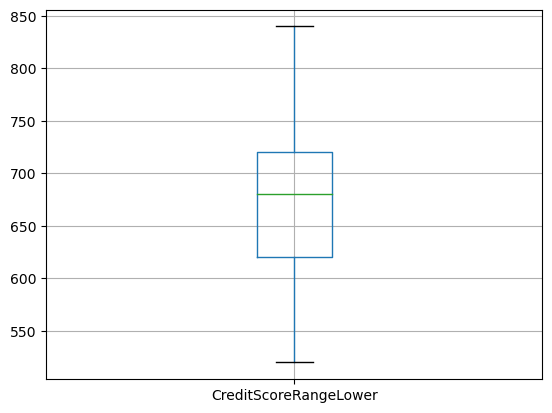

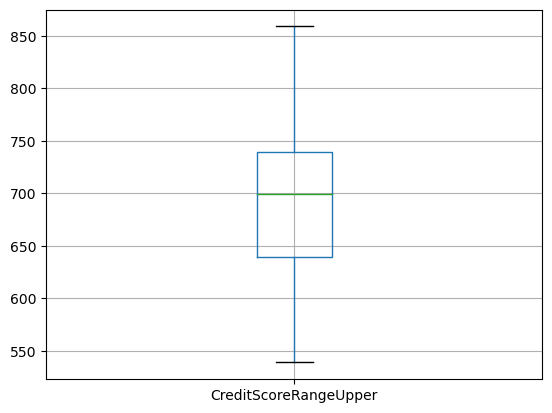

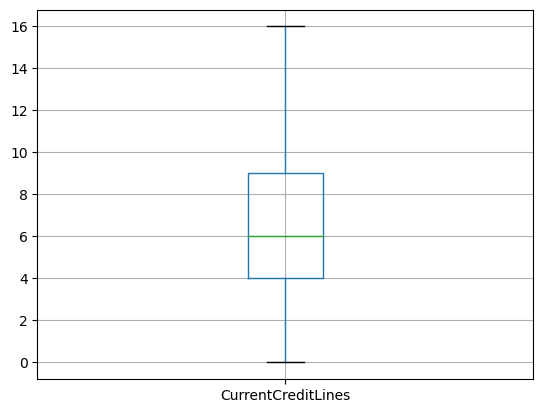

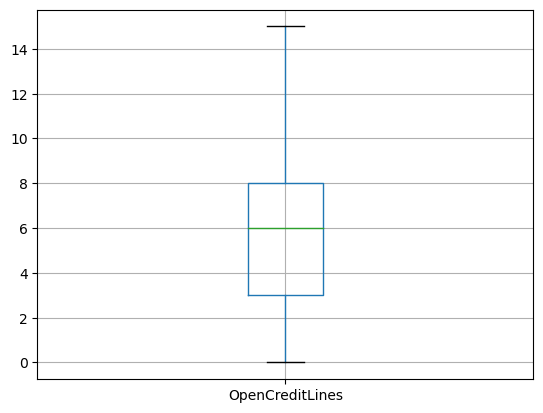

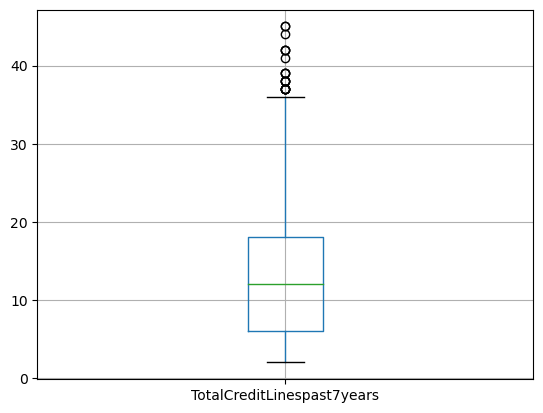

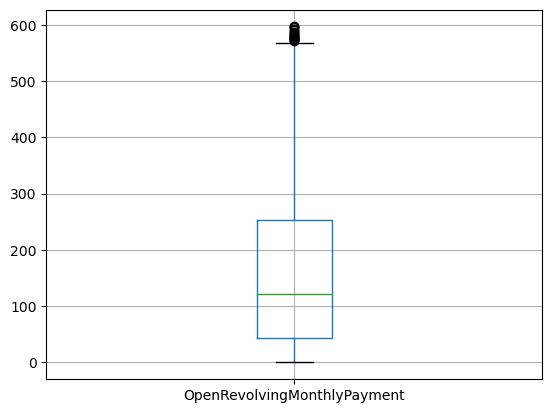

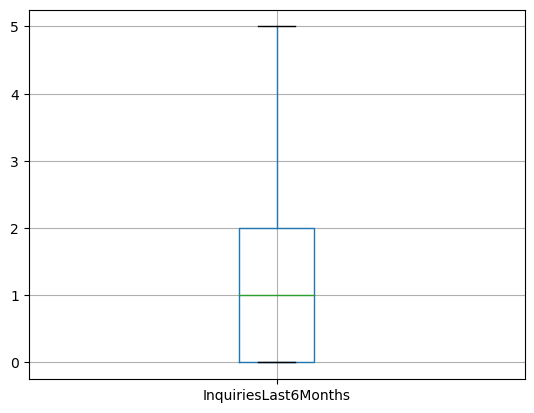

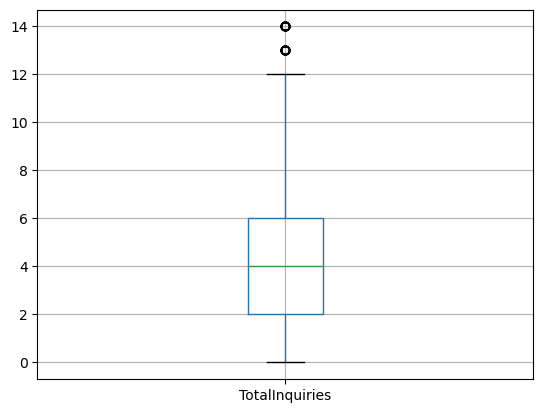

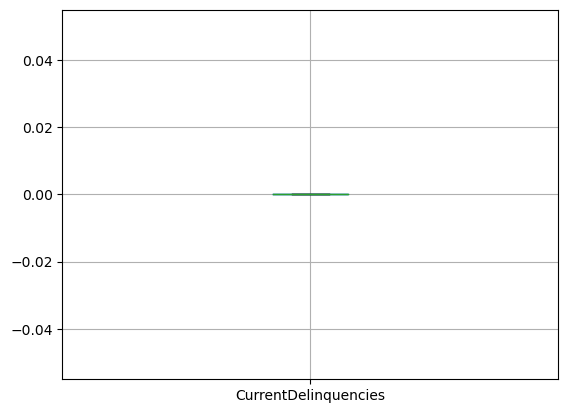

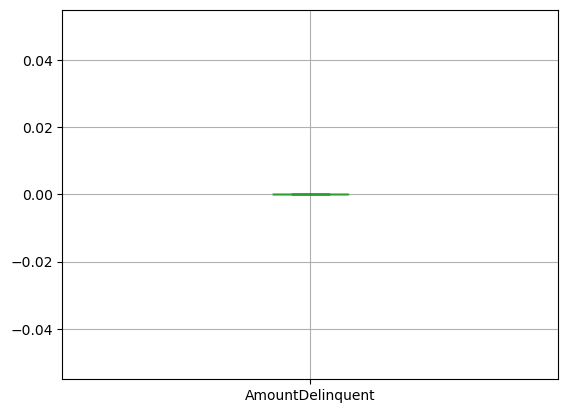

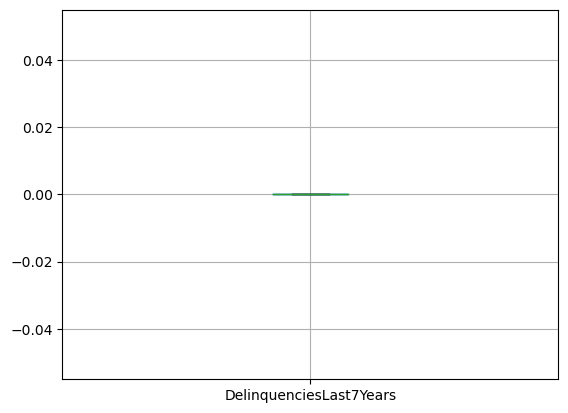

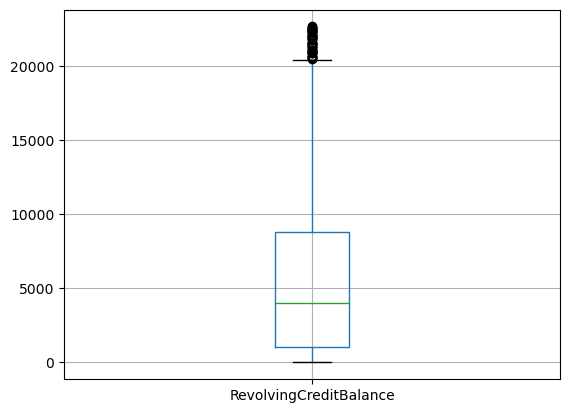

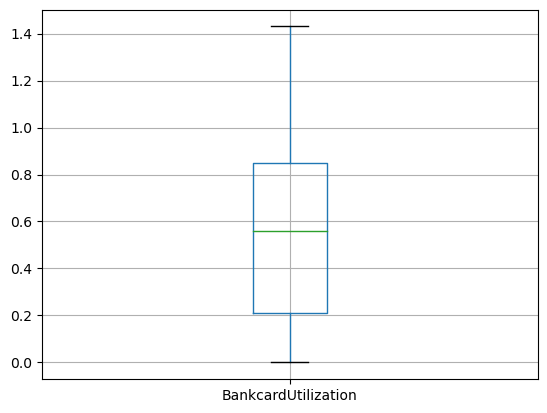

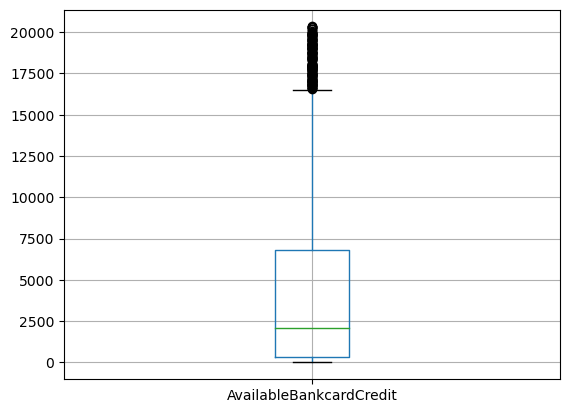

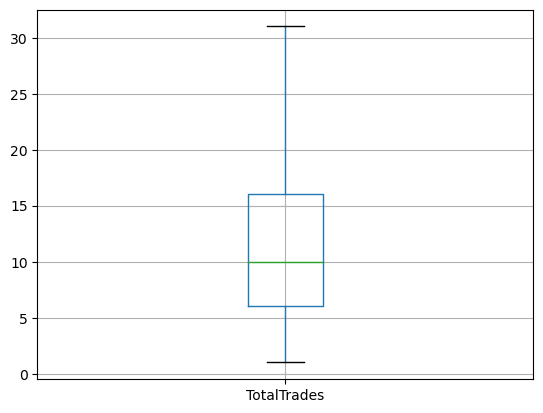

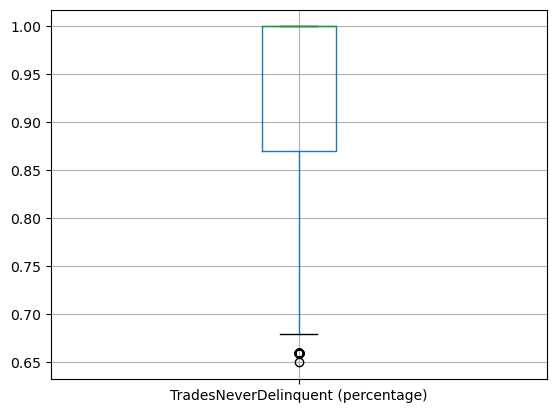

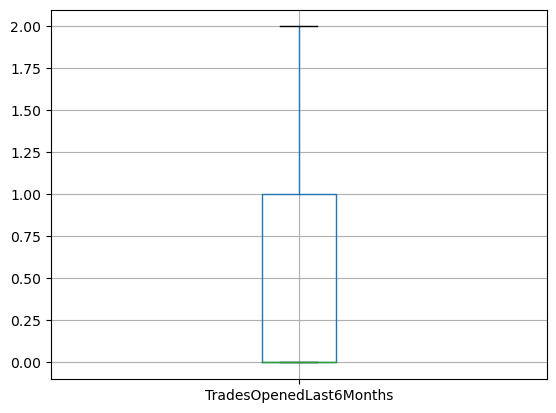

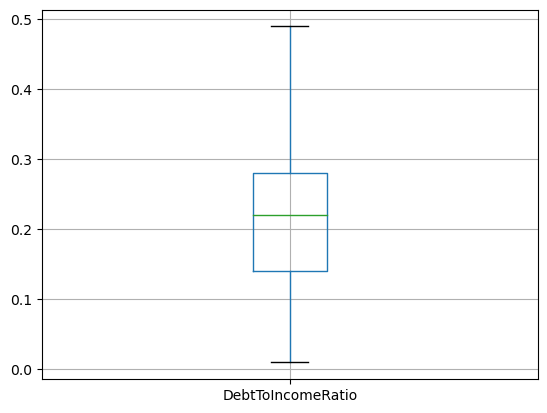

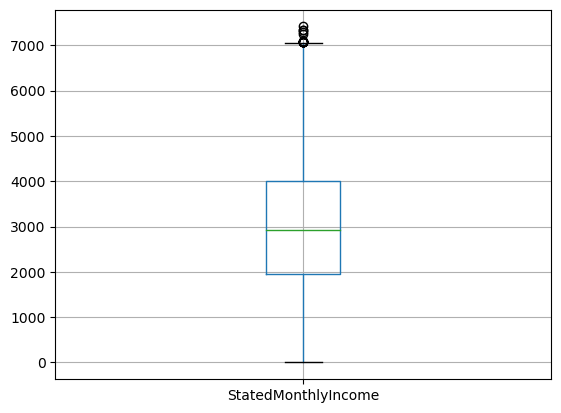

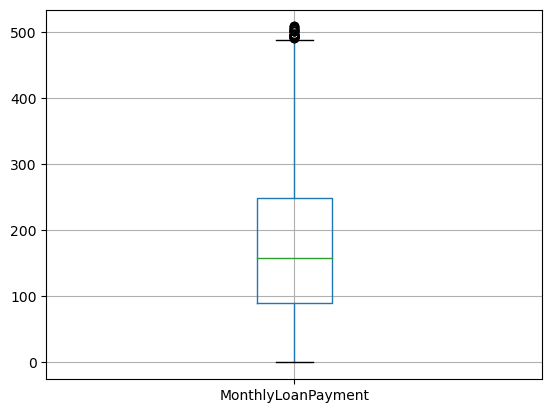

In [50]:
#After removing outliers
col = loan_df.select_dtypes(include=('float')).columns
for column in col:
    plt.figure()
    loan_df.boxplot([column])

In [51]:
loan_df['IncomeRange'].replace(to_replace="Not employed", value="$0", inplace=True)
loan_df['IncomeRange'].replace(to_replace="Not displayed", value="$0", inplace=True)

In [52]:
loan_df['IncomeRange'].value_counts()


$25,000-49,999    1418
$1-24,999          636
$50,000-74,999     557
$0                 168
$75,000-99,999     102
Name: IncomeRange, dtype: int64

In [54]:
##le=LabelEncoder()
#c=loan_df.select_dtypes(include=('object')).columns
#for i in c :
 # loan_df[i]=le.fit_transform(loan_df[i])

In [55]:
import warnings
warnings.filterwarnings('ignore')

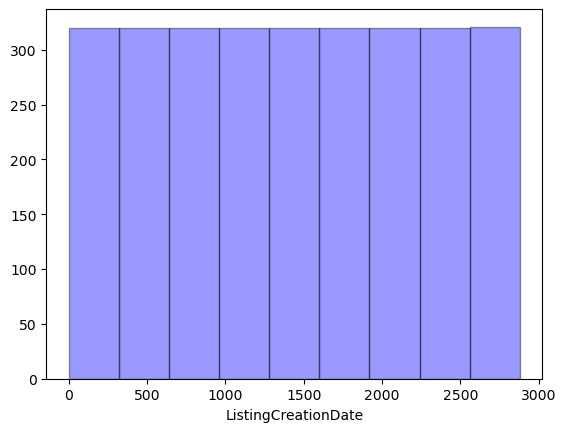

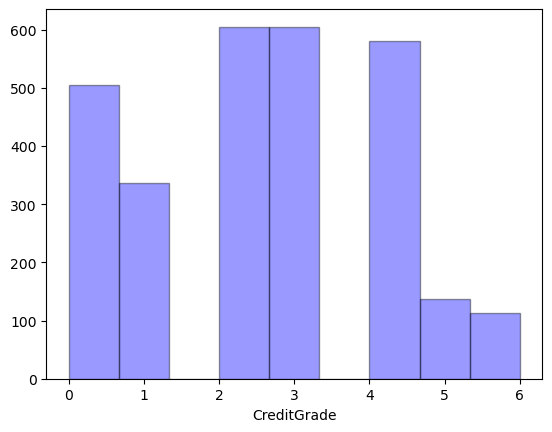

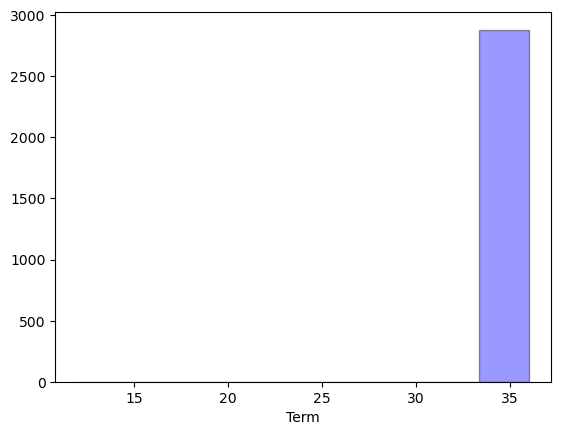

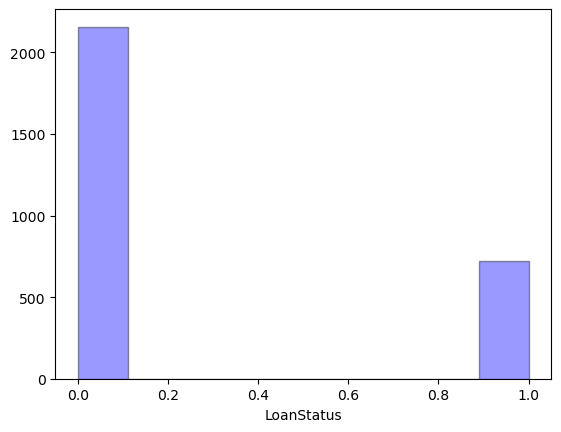

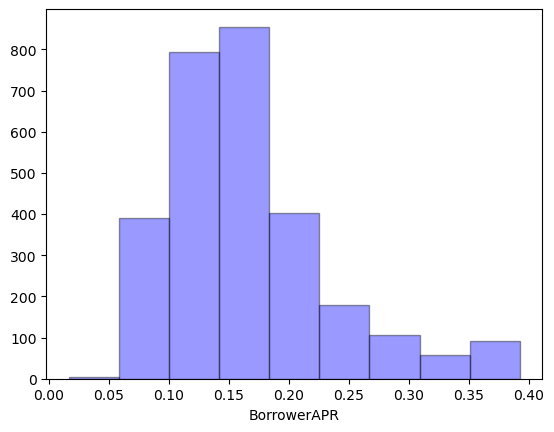

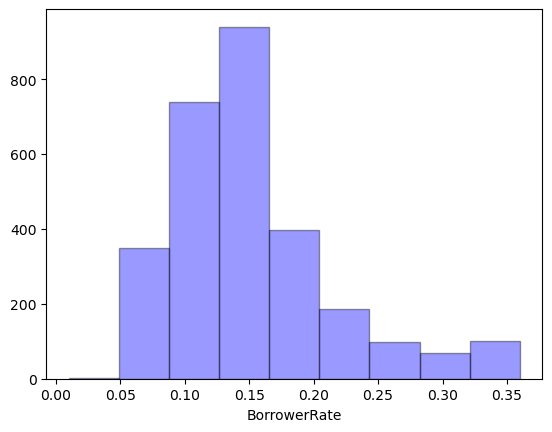

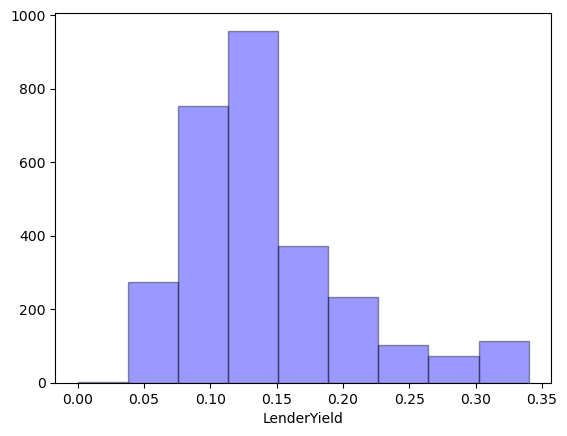

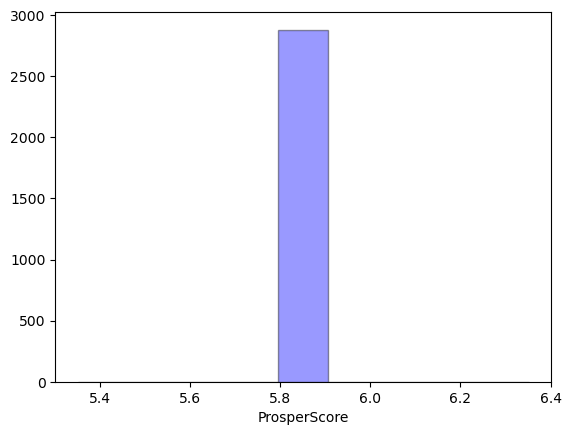

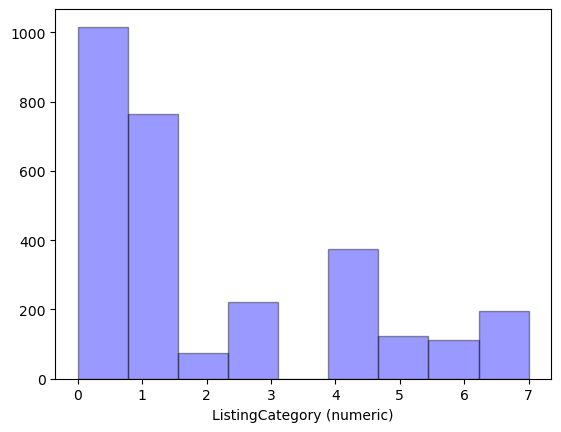

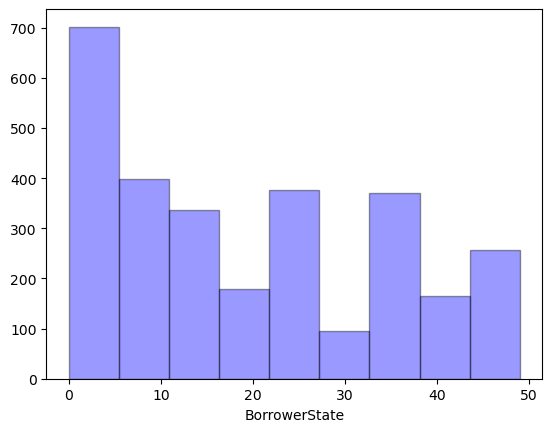

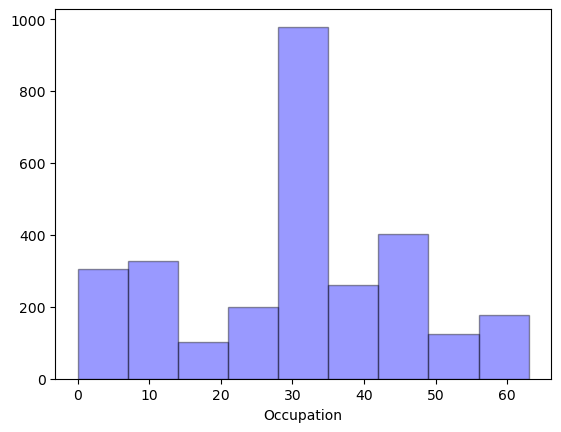

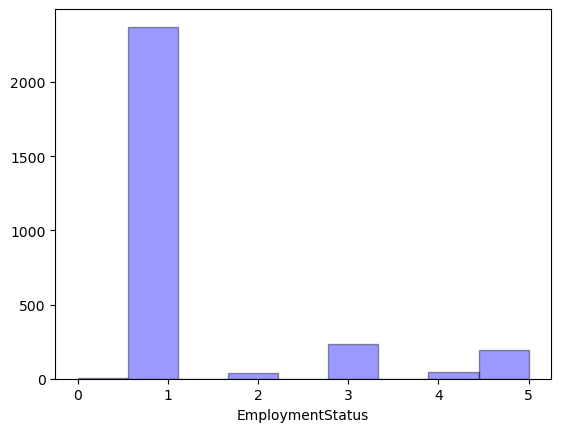

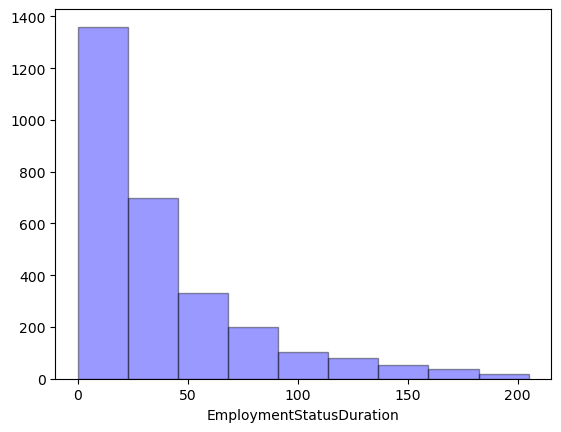

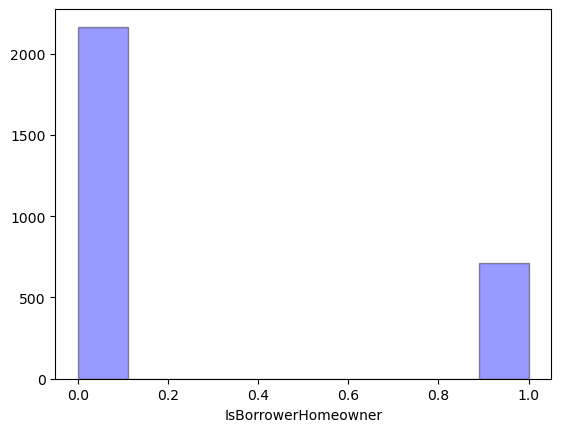

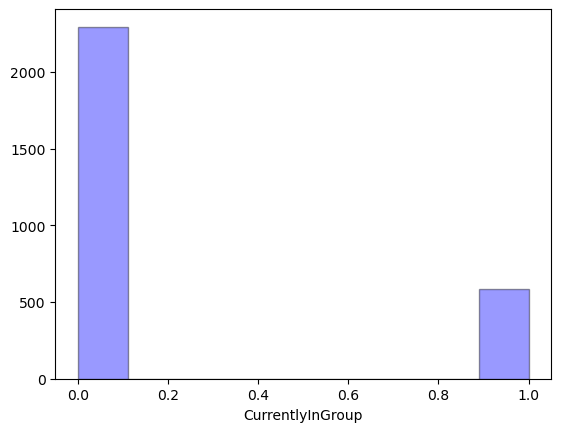

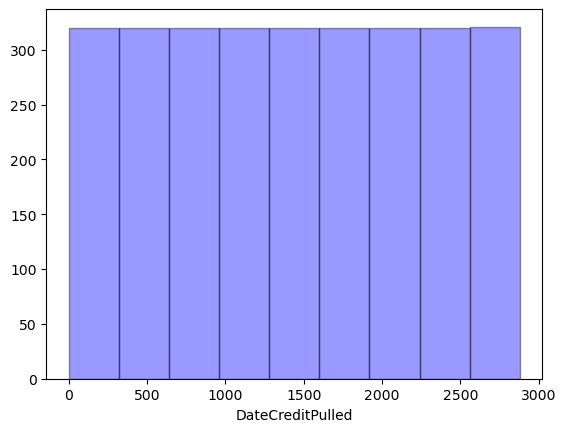

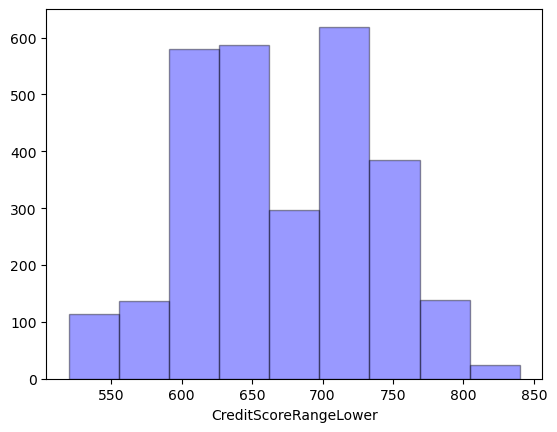

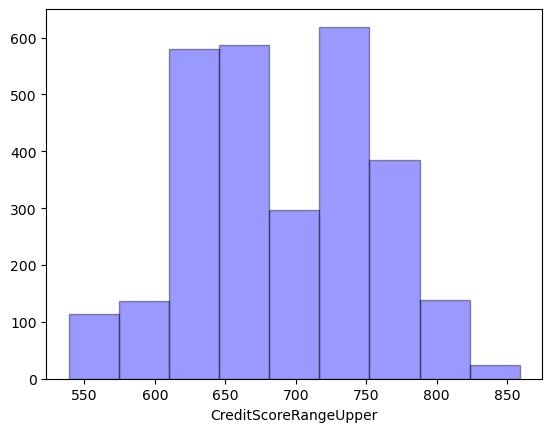

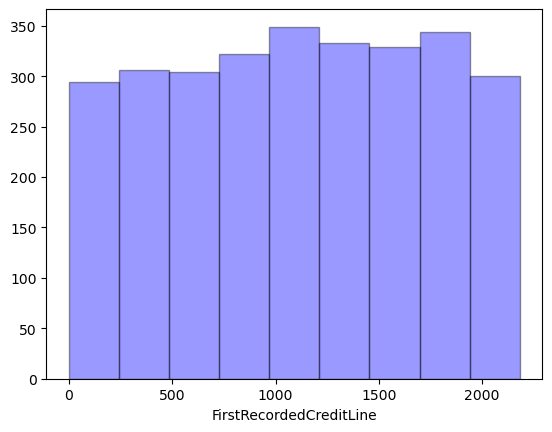

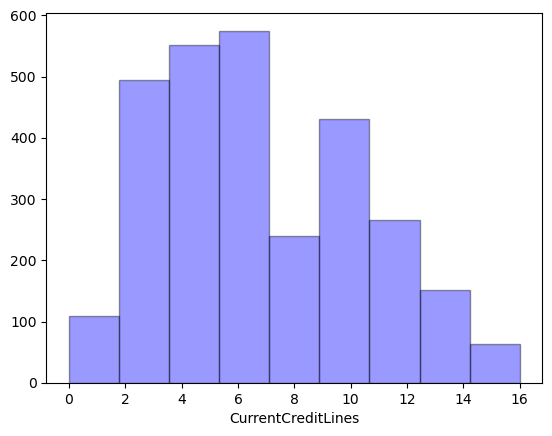

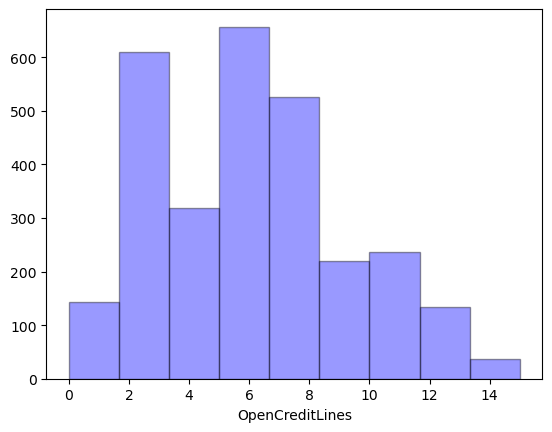

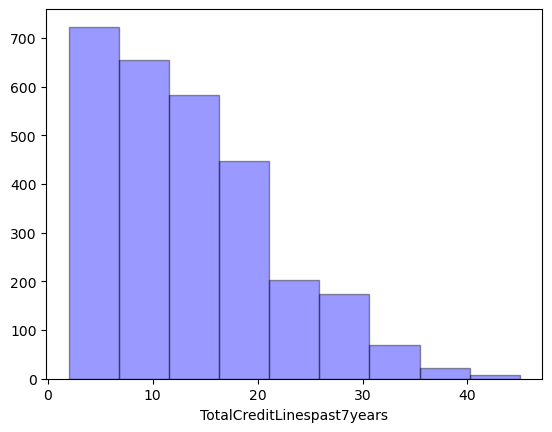

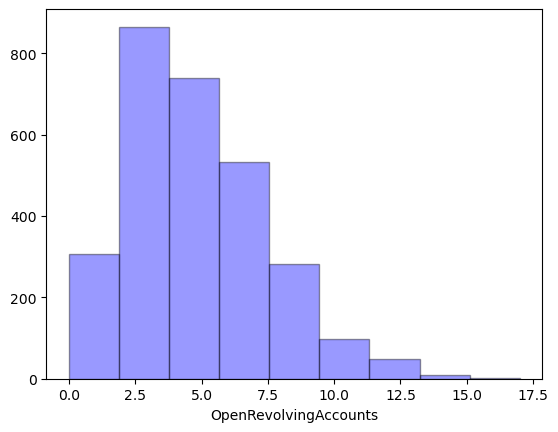

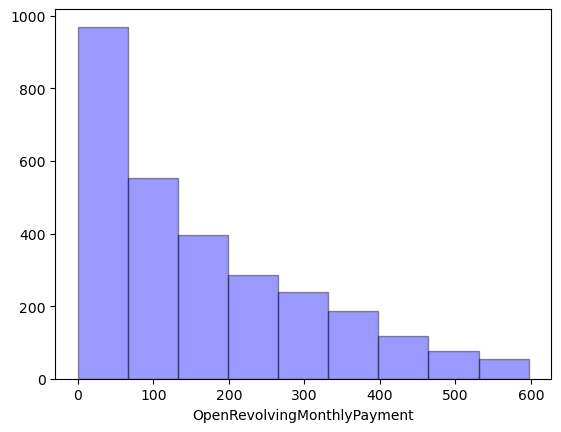

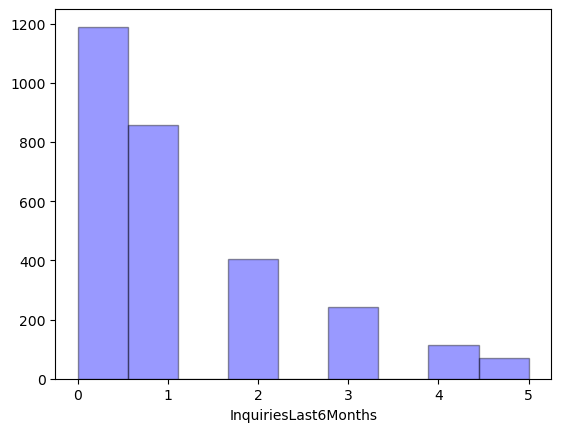

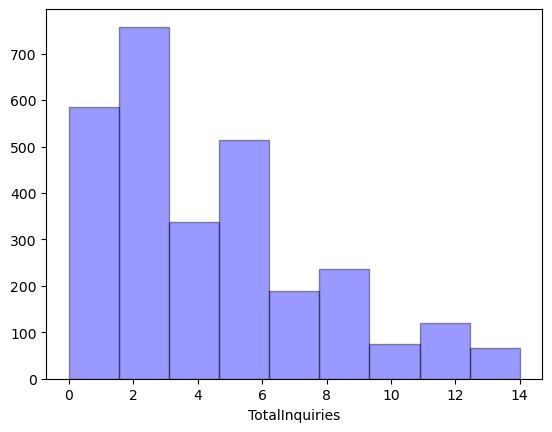

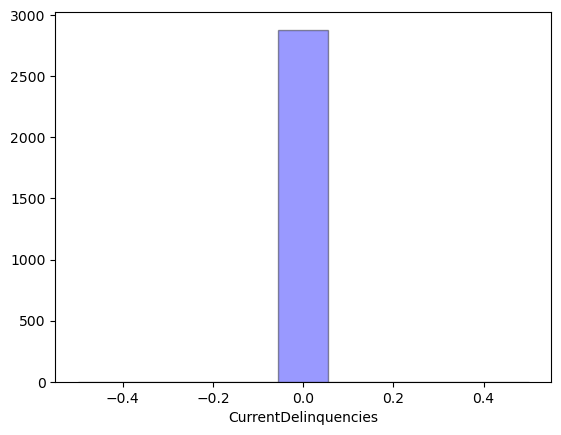

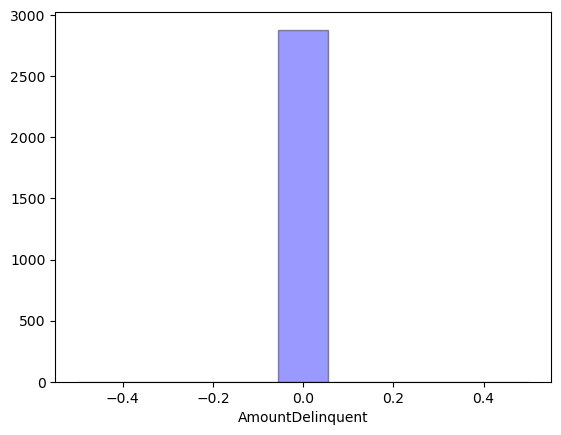

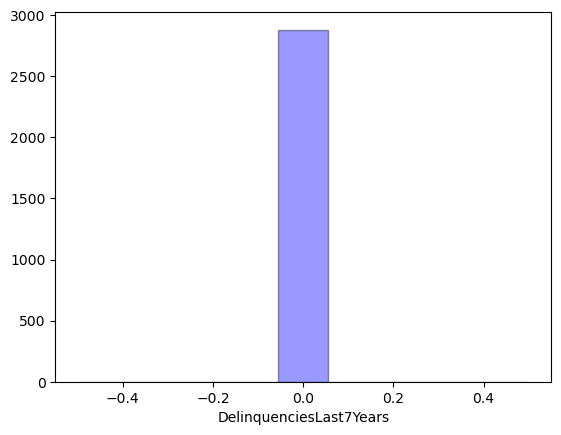

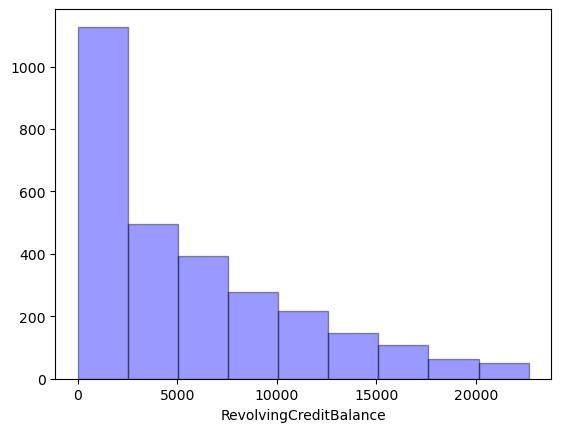

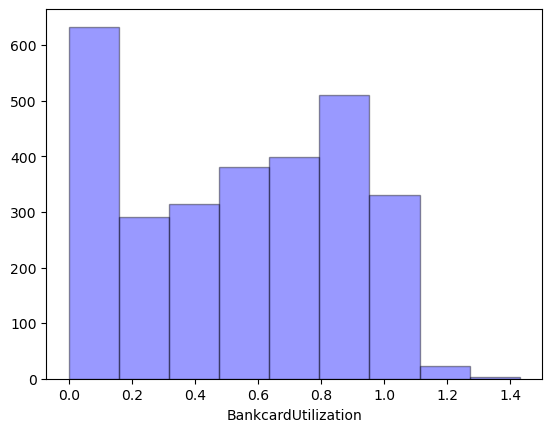

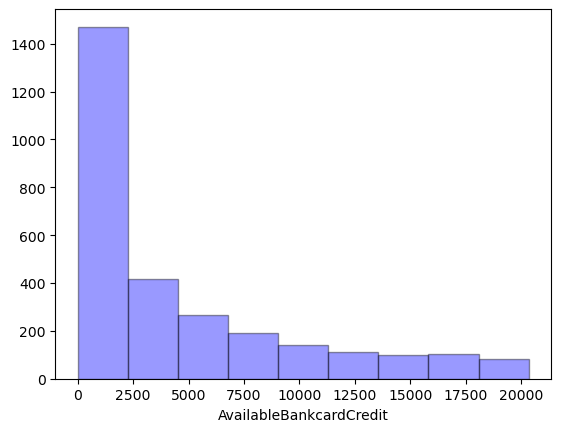

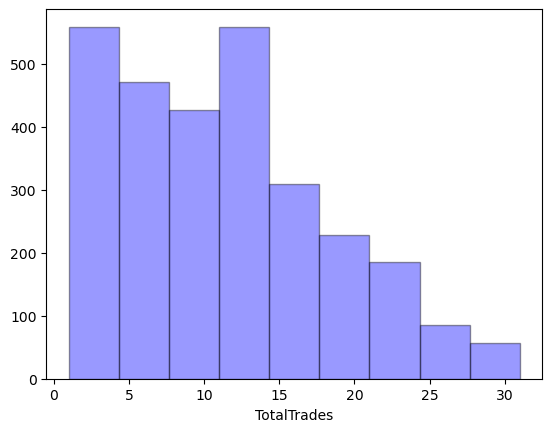

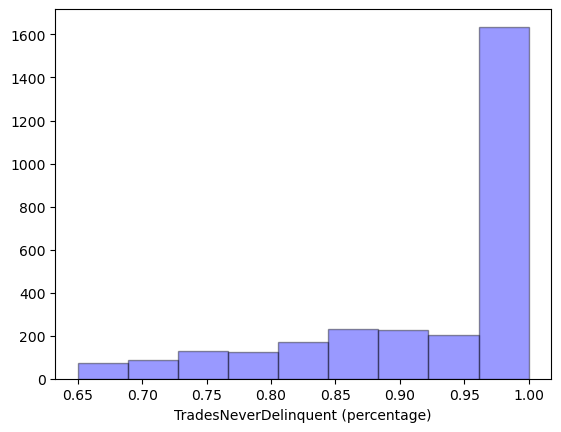

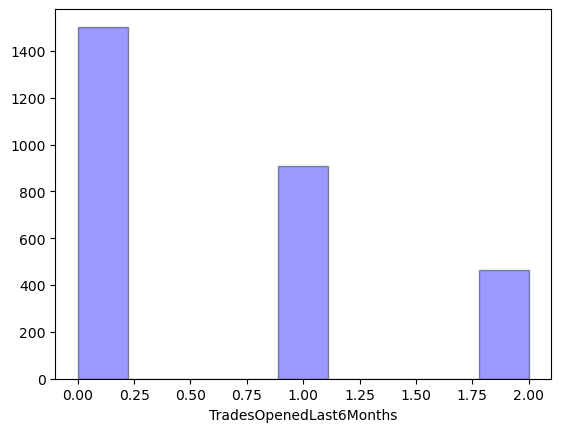

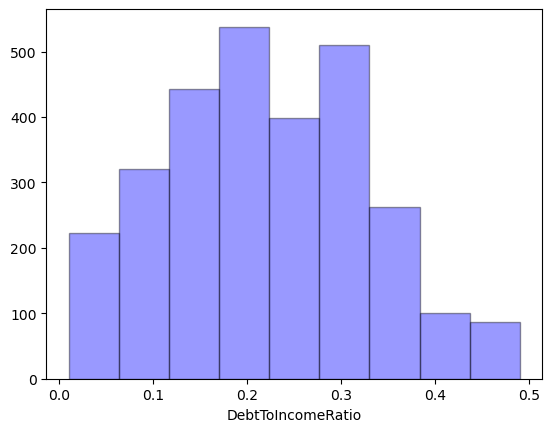

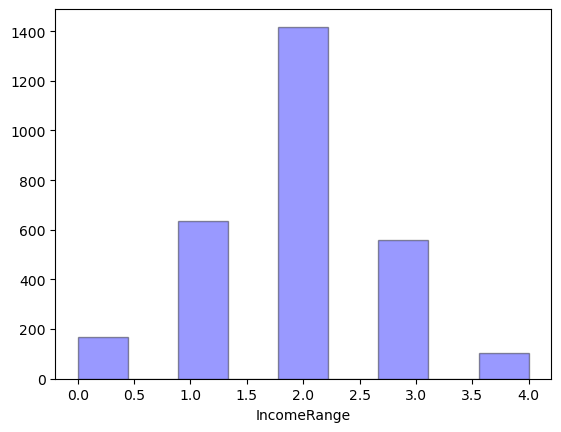

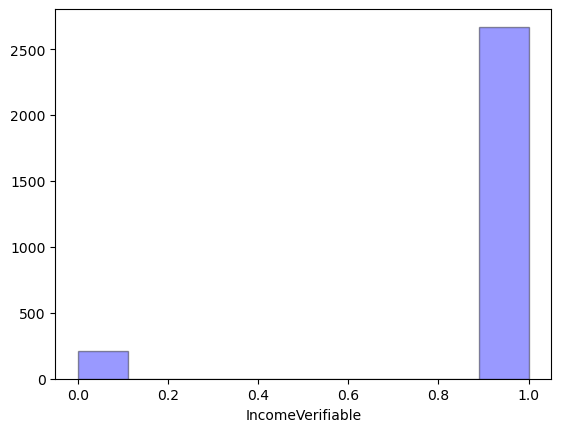

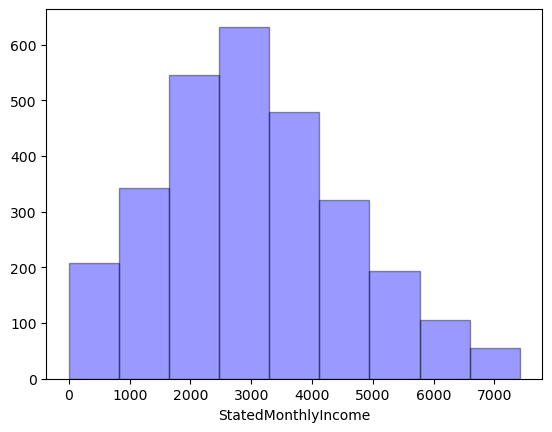

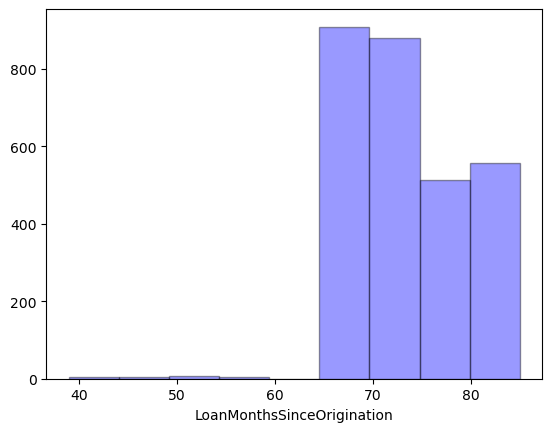

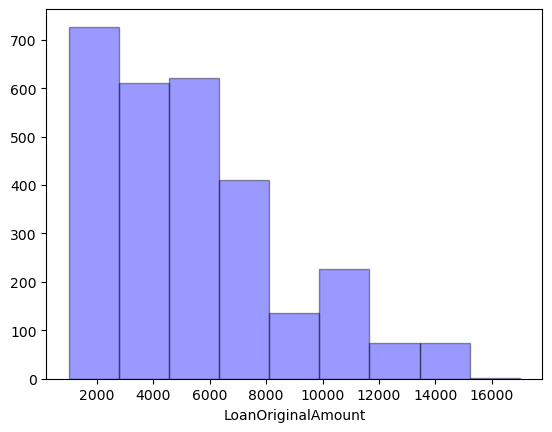

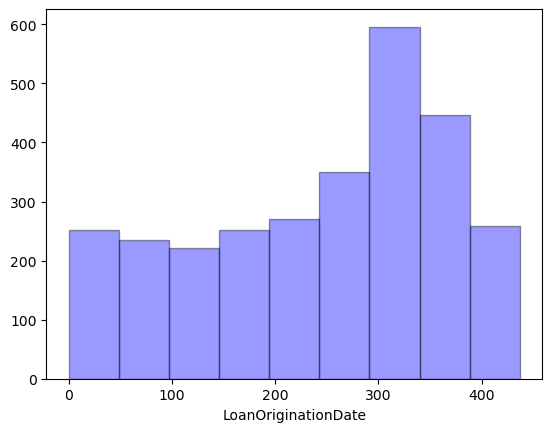

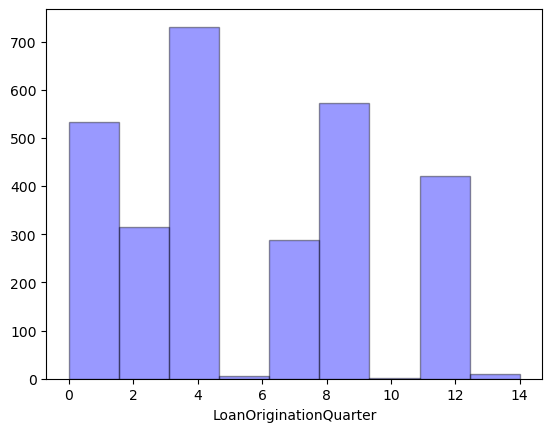

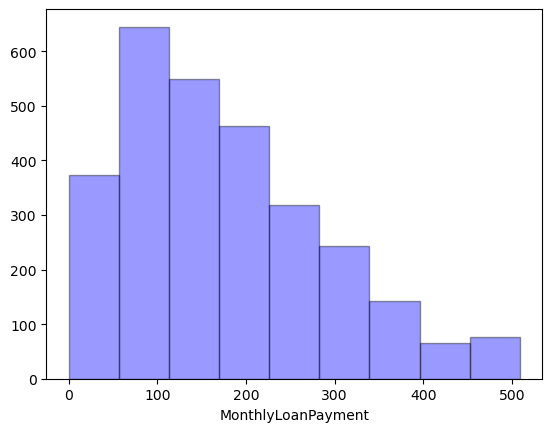

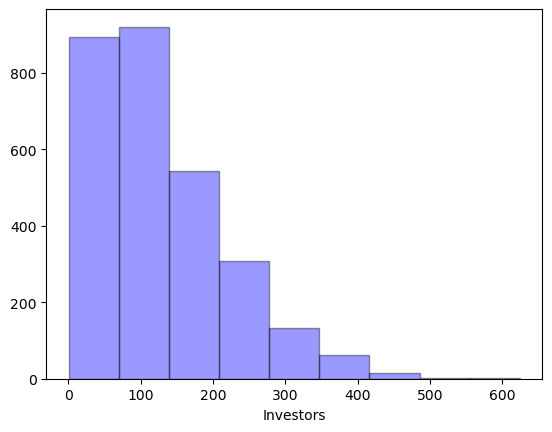

In [56]:
# distribution 
col=loan_df.columns
for i in col :
  sns.distplot(loan_df[i], hist=True, kde=False,bins=9, color = 'blue',hist_kws={'edgecolor':'black'})
  plt.show()
     

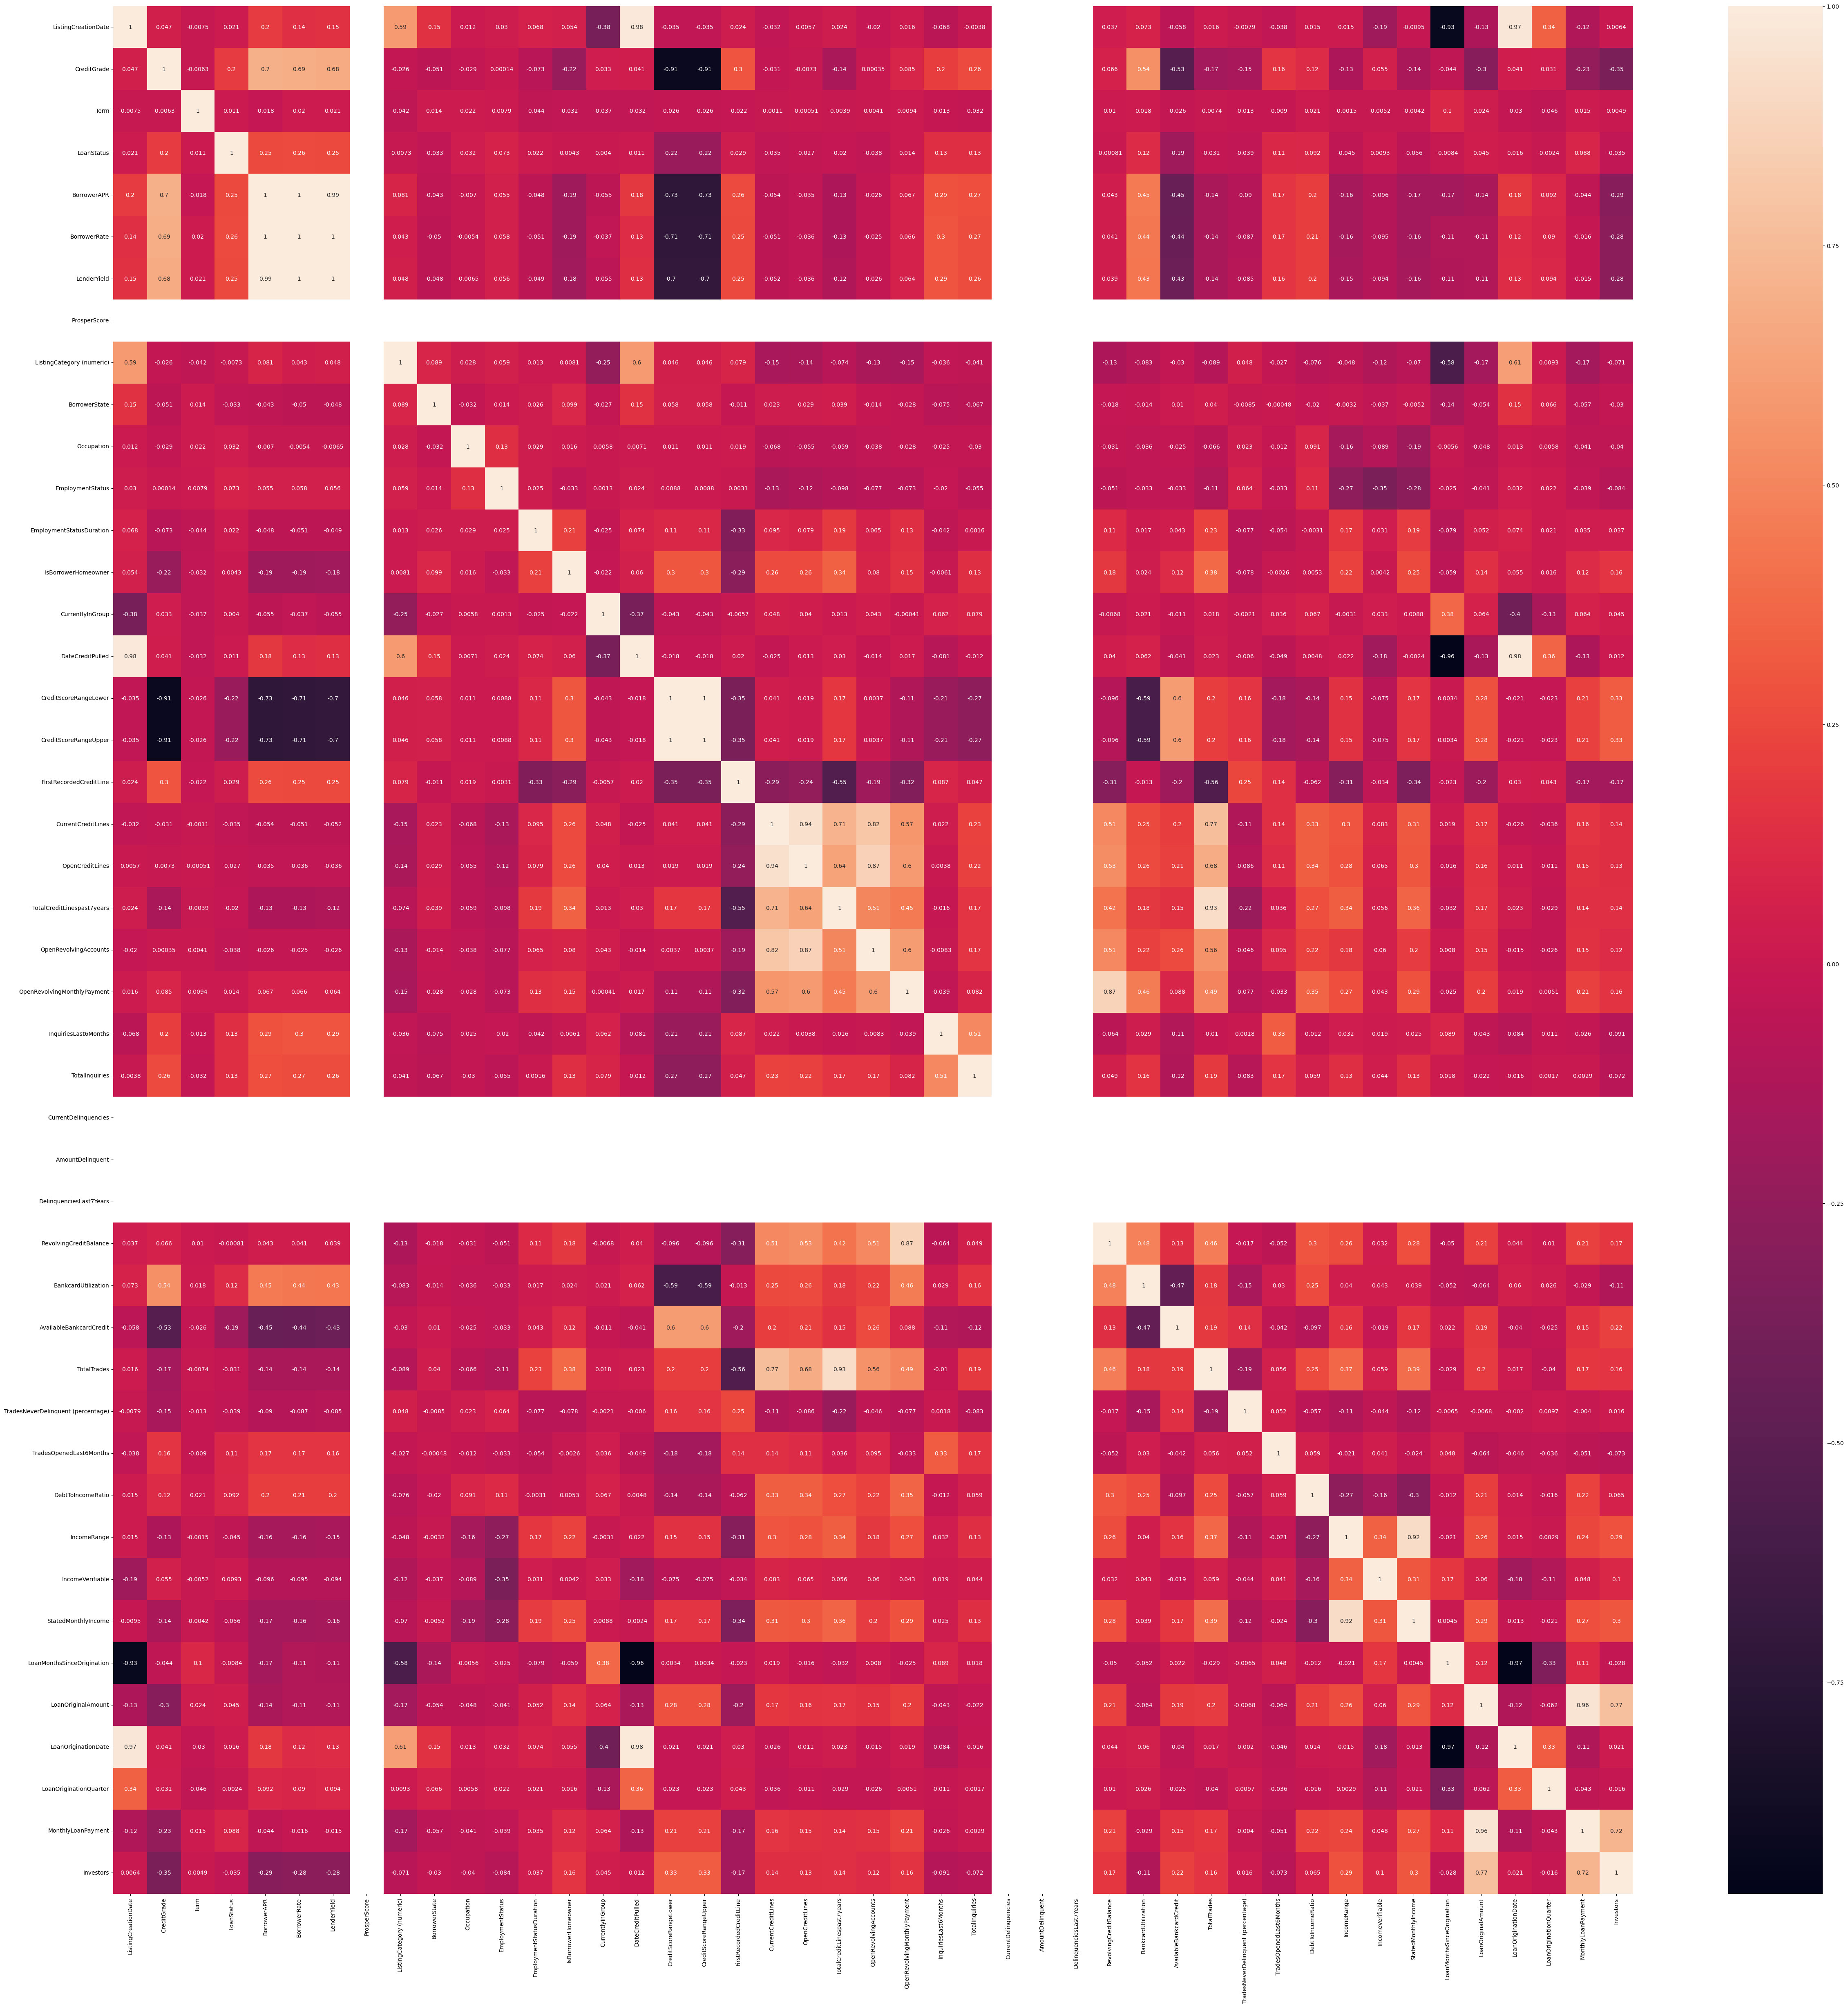

In [57]:
# Heatmap of correlation matrix
plt.figure(figsize=(60,60)) 
sns.heatmap(loan_df.corr(),annot = True)
plt.show()

Research Questions

Action: presentation three main focuses are on the most critical part of Peer-to-Peer Lending which is CreditGrade , BorrowerRate and Lender Yield not to mention the custom built risk assesment tool called ProsperScore to assess the creditworthiness of the borrower.

Research Question 1 : What are the most number of borrowers Credit Grade?

<AxesSubplot:xlabel='CreditGrade', ylabel='count'>

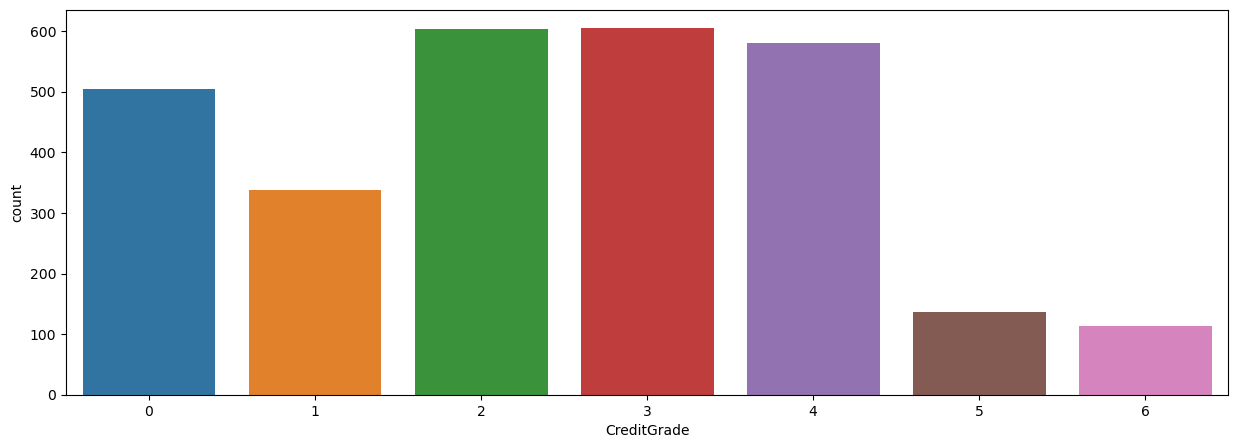

In [58]:
# Check the univariate relationship of Credit Grade# Check the univariate relationship of Credit Grade
plt.figure(figsize=(15,5))
sns.countplot(x='CreditGrade', data=loan_df)

Research Question 2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?

In [59]:
# Check the univariate relationship of Loan Status
plt.figure(figsize=(15,5))
freq_table = loan_df["LoanStatus"].value_counts()
print(freq_table)

0    2157
1     724
Name: LoanStatus, dtype: int64


<Figure size 1500x500 with 0 Axes>

Research Question 3 : What is the highest number of BorrowerRate?

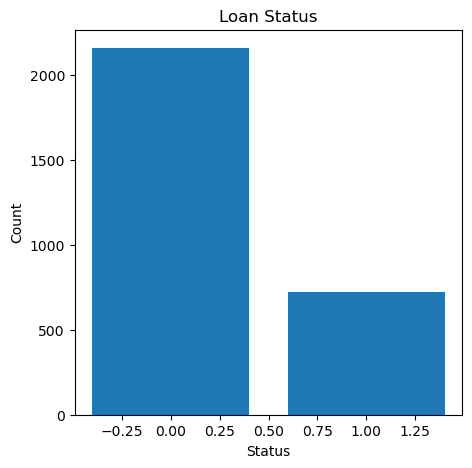

In [60]:
# Create a bar chart of Loan Status
plt.figure(figsize=(5,5))
plt.bar(freq_table.index, freq_table.values)
plt.title("Loan Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

Research Question 4 : Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='BorrowerRate'>

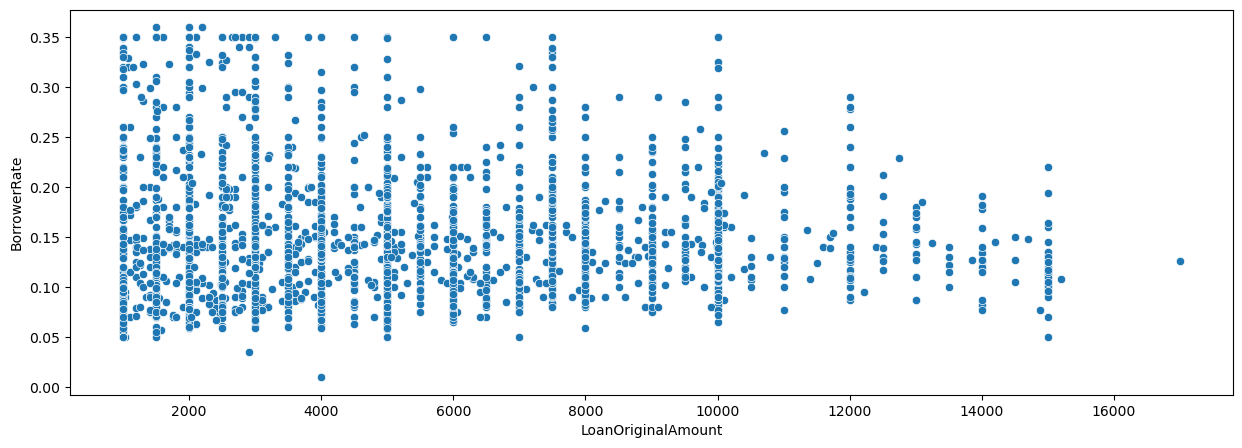

In [61]:
# Visualize the relationship between borrower rate and loan amount
plt.figure(figsize=(15,5))
sns.scatterplot(data=loan_df, x='LoanOriginalAmount', y='BorrowerRate')

Research Question 5 : Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

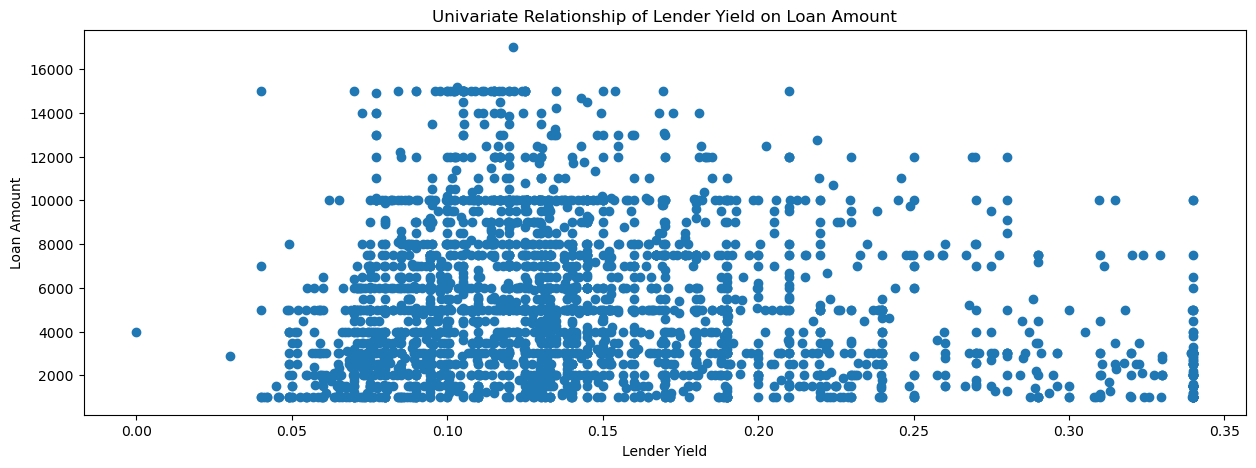

In [62]:
# Create a scatter plot of Lender Yield vs Loan Amount
plt.figure(figsize=(15,5))
plt.scatter(loan_df['LenderYield'], loan_df['LoanOriginalAmount'])
plt.xlabel('Lender Yield')
plt.ylabel('Loan Amount')
plt.title('Univariate Relationship of Lender Yield on Loan Amount')
plt.show()
     

Research Question 6 : Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.

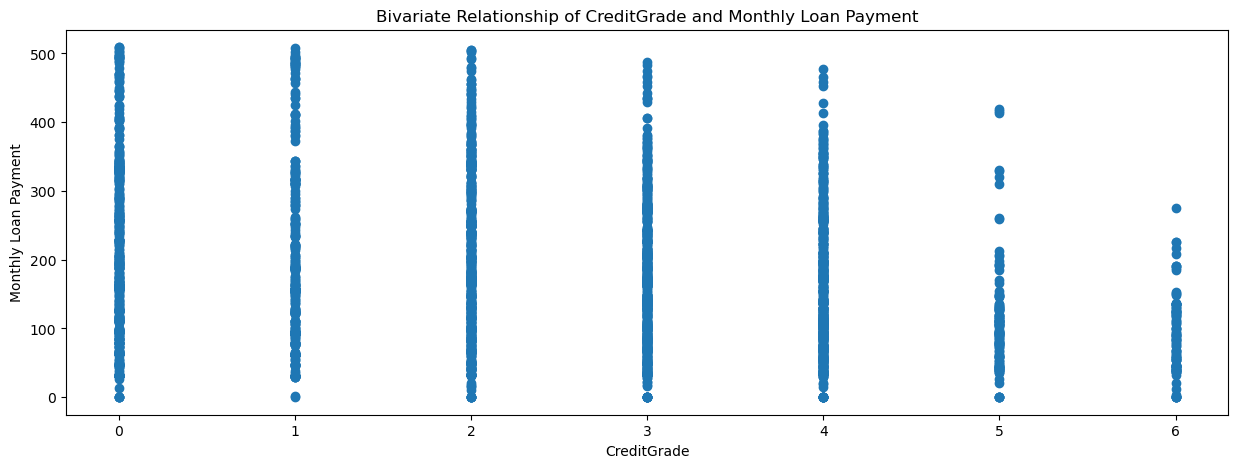

In [64]:
# Create a scatter plot of CreditGrade vs MonthlyLoanPayment
plt.figure(figsize=(15,5))
plt.scatter(loan_df['CreditGrade'],loan_df['MonthlyLoanPayment'])
plt.xlabel('CreditGrade')
plt.ylabel('Monthly Loan Payment')
plt.title('Bivariate Relationship of CreditGrade and Monthly Loan Payment')
plt.show()

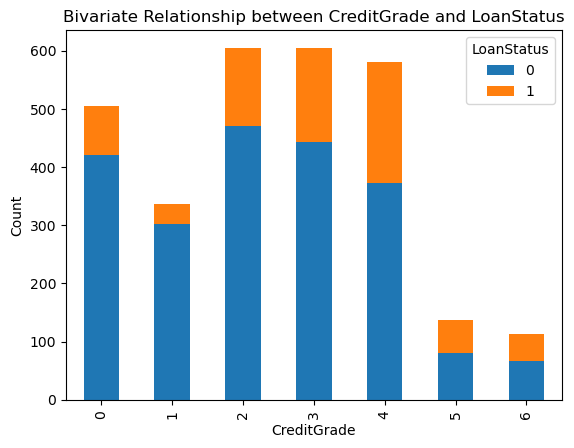

In [66]:
# Create a contingency table of CreditGrade vs LoanStatus
ctable = pd.crosstab(loan_df['CreditGrade'], loan_df['LoanStatus'])
# Create a stacked bar chart of CreditGrade vs LoanStatus
ctable.plot(kind='bar', stacked=True)
plt.xlabel('CreditGrade')
plt.ylabel('Count')
plt.title('Bivariate Relationship between CreditGrade and LoanStatus')
plt.show()

Research Question 7 : Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?

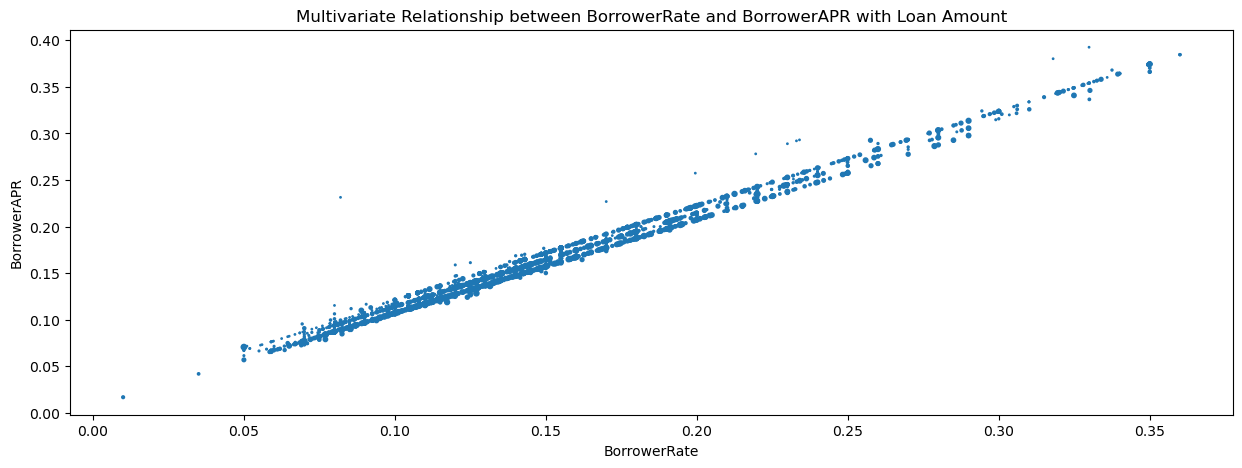

In [67]:
# Create a scatter plot of BorrowerRate vs BorrowerAPR with LoanOriginalAmount represented by marker size
plt.figure(figsize=(15,5))
plt.scatter(loan_df['BorrowerRate'], loan_df['BorrowerAPR'], s=loan_df['LoanOriginalAmount']/1000)
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.title('Multivariate Relationship between BorrowerRate and BorrowerAPR with Loan Amount')
plt.show()

In [68]:
loan_df.columns

Index(['ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years', 'RevolvingCreditBalance',
       'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanMonthsSinceOrigination',
       'LoanOriginalAmount'

# Feature Extraction

# 1-Equated Monthly Installments (EMI)
Tenure --> Loan Tenure
Principle repayment --> LP_CustomerPrinciplePayments
Interest --> BorrowerRate

In [108]:
emi_cols = ['LP_CustomerPayments' , 'LP_CustomerPrincipalPayments']
X[emi_cols].head()

,LP_CustomerPayments,LP_CustomerPrincipalPayments
0,11396.14,9425.00
1,0.00,0.00
2,4186.63,3001.00
3,5143.20,4091.09
4,2819.85,1563.22


For each row in the dataset:

Calculate result_1 = P* r * [(1-r)] ^n
Calculate result_2 = [(1+r)]^n-1
Calculate EMI = result1 / result2

In [109]:
def cal_EMI(P , r , n):
  P = P.values
  r = r.values
  n = n.values
  #print(P.shape[0])
  result_1 = np.empty(0)
  result_2 = np.empty(0)
  result = np.empty(0)
  for i in range(P.shape[0]):
    #print(P[i])
    #print(r[i])
    #print(n[i])
    #EMI = P x r x (1+r) ^ n / ((1+r)) ^ n - 1)
    #print(P[i] * (1+r[i]))
    result_1 = np.append(result_1 , P[i] * r[i] * np.power((1 + r[i]),n[i]))
    result_2 = np.append(result_2 , np.power((1 + r[i]) , n[i]) - 1)
    result =  np.append(result , (result_1[i] / result_2[i]))
 
  return result

In [110]:
X.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:3

In [111]:
X['ClosedDate']=pd.to_datetime(X['ClosedDate'])

In [112]:
X['𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑦𝑒𝑎𝑟'] = X['ClosedDate'].dt.year
X['month'] = X['ClosedDate'].dt.month

In [113]:
X['LoanOriginationDate']

0         2007-09-12 00:00:00
1         2014-03-03 00:00:00
2         2007-01-17 00:00:00
3         2012-11-01 00:00:00
4         2013-09-20 00:00:00
                 ...         
113932    2013-04-22 00:00:00
113933    2011-11-07 00:00:00
113934    2013-12-23 00:00:00
113935    2011-11-21 00:00:00
113936    2014-01-21 00:00:00
Name: LoanOriginationDate, Length: 113937, dtype: object

In [114]:
X['LoanOriginationDate']=pd.to_datetime(X['LoanOriginationDate'])

In [115]:
X['𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑦𝑒𝑎𝑟'] = X['LoanOriginationDate'].dt.year
X['𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ'] = X['LoanOriginationDate'].dt.month

In [116]:
X['𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ']

0          9
1          3
2          1
3         11
4          9
          ..
113932     4
113933    11
113934    12
113935    11
113936     1
Name: 𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ, Length: 113937, dtype: int64

LoanTenure = (𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑦𝑒𝑎𝑟 − 𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑦𝑒𝑎𝑟) 𝑥 12 − (𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ − 𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑚𝑜𝑛𝑡ℎ)

In [118]:
X['LoanTenure']=((X['𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑦𝑒𝑎𝑟']-X['𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑦𝑒𝑎𝑟'])*12)-(X['𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ']-X['month'])

In [119]:
X['LoanTenure']

0        -25.0
1          NaN
2        -13.0
3          NaN
4          NaN
          ... 
113932     NaN
113933     NaN
113934     NaN
113935   -27.0
113936     NaN
Name: LoanTenure, Length: 113937, dtype: float64

In [120]:
X['EMI']=cal_EMI(X['LP_CustomerPrincipalPayments'],X['BorrowerRate'],X['LoanTenure'])

In [121]:
X.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑦𝑒𝑎𝑟,month,𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑦𝑒𝑎𝑟,𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ,LoanTenure,EMI
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2009.0,8.0,2007,9,-25.0,-39.035716
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,NaN,NaN,2014,3,NaN,NaN
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,2009.0,12.0,2007,1,-13.0,-36.629126
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,NaN,NaN,2012,11,NaN,NaN
4,0F023589499656230C5E3E2,909464,2013-09

2- Preferred Return on Investment (PROI)

In [122]:
def PROI(df):
  #calculate ROI
  X['InterestAmount'] = (X['LoanOriginalAmount']*(X['BorrowerRate']))
  X['TotalAmount'] = (X['InterestAmount']+X['LoanOriginalAmount'])
  X['ROI'] = (X['InterestAmount']/X['TotalAmount'])

  #setting root
  X['PROI'] = X['ROI'].median()

  for i in range(X.shape[0]):
    #check out the creditGrade
    if X['CreditGrade'].iloc[i] == 'E':
      X['PROI'].iloc[i] = X['PROI'].iloc[i] + 0.05
    elif X['CreditGrade'].iloc[i] == 'HR':
      X['PROI'].iloc[i] = X['PROI'].iloc[i] + 0.05
    elif X['CreditGrade'].iloc[i] == 'A':
      X['PROI'].iloc[i] = X['PROI'].iloc[i] - 0.05
    elif X['CreditGrade'].iloc[i] == 'AA':
      X['PROI'].iloc[i] = X['PROI'].iloc[i] - 0.1

    #check out the TradesNeverDeliquent
    if X['TradesNeverDelinquent (percentage)'].iloc[i].all() < 0.7:
      X['PROI'].iloc[i] = X['PROI'].iloc[i] + 0.05


    #check out the AvailableBankCreditCardCredit
    if X['AvailableBankcardCredit'].iloc[i] <= 800:
       X['PROI'].iloc[i] = X['PROI'].iloc[i] + 0.05
    elif X['AvailableBankcardCredit'].iloc[i] >= 16500:
       X['PROI'].iloc[i] = X['PROI'].iloc[i] + 0.05

    #check out TotalInquiries
    if X['TotalInquiries'].iloc[i] > 28:
       X['PROI'].iloc[i] = X['PROI'].iloc[i] + 0.1
    elif X['TotalInquiries'].iloc[i] > 12:
       X['PROI'].iloc[i] = X['PROI'].iloc[i] + 0.05

      
  print(X['ROI'].describe())

  return X['PROI']


In [ ]:
X['PROI']=PROI(X)


# 3-Elgible Loan Amount (ELA)
Components of ELA:

A: 'AppliedAmount' --> LoanOriginalAmount
R: 'Interest' --> BorrowerRate
N: 'LoanTenure' --> LoanTenure
I: 'IncomeTotal' --> StatedMonthlyIncome

In [124]:
ela_cols = ['DebtToIncomeRatio' , 'IncomeRange' , 'IncomeVerifiable' , 'StatedMonthlyIncome']

X[ela_cols].head()

,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome
0,0.17,"$25,000-49,999",True,3083.333333
1,0.18,"$50,000-74,999",True,6125.000000
2,0.06,Not displayed,True,2083.333333
3,0.15,"$25,000-49,999",True,2875.000000
4,0.26,"$100,000+",True,9583.333333


In [125]:
X_new = X[X['IncomeVerifiable'] == True]

print(X_new.shape)
print(X.shape[0] - X_new.shape[0])

(105268, 90)
8669


In [ ]:
Calculation Procedure for each row in the dataset:

Calculate: Total Payment Due = (A + (Ar))n
Calculate: Max allowable amount = I * 12 * 30%
If(total Payment Due <= Max allowable amount) Then ELA = AppliedAmount Else ELA = Max allowable amount

In [126]:
def calculate_total_payment_due(A, Ar, n):
    return (A + (Ar))* n

def calculate_max_allowable_amount(I):
    return I * 12 * 0.3

def calculate_ela(total_payment_due, max_allowable_amount, applied_amount):
    if total_payment_due <= max_allowable_amount:
        return applied_amount
    else:
        return max_allowable_amount


ela_values = []  # Initialize an empty list to store ela values

for i in range(len(X_new)):
    row = X_new.iloc[i]
    total_payment_due = calculate_total_payment_due(row['LoanOriginalAmount'], row['LoanOriginalAmount']*row['BorrowerRate'], row['LoanTenure'])
    max_allowable_amount = calculate_max_allowable_amount(row['StatedMonthlyIncome'])
    ela = calculate_ela(total_payment_due, max_allowable_amount, row['LoanOriginalAmount'])
    ela_values.append(ela)  # Append ela value to the list

X_new['EligibleLoanAmount'] = ela_values  # Assign the list of ela values to the column

print(X_new['EligibleLoanAmount'])


0          9425.000000
1         22050.000000
2          3001.000000
3         10350.000000
4         34499.999999
              ...     
113932    15599.999999
113933    28950.000001
113934    10350.000000
113935    15000.000000
113936    16499.999999
Name: EligibleLoanAmount, Length: 105268, dtype: float64
